## Enzyme Stability Prediction - Ajish  Kurian Daniel
### https://www.linkedin.com/in/ajish-kurian-daniel/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind,shapiro , levene ,kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import * 
from sklearn.model_selection import * 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from pycaret.regression import*
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from sklearn.decomposition import PCA
from scipy.stats import *
from sklearn.model_selection import *
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train.csv')

# Business Problem 

## Understanding and accurately predict protein stability is a fundamental problem in biotechnology. Its applications include enzyme engineering for addressing the world’s challenges in sustainability, carbon neutrality and more. Improvements to enzyme stability could lower costs and increase the speed scientists can iterate on concept.

**seq_id: unique identifier of each protein variants
protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence. (Please note that most of the sequences in the test data have the same length of 221 amino acids, but some of them have 220 because of amino acid deletion.)
pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
data_source: source where the data was published
tm: target column. Since only the spearman correlation will be used for the evaluation, the correct prediction of the relative order is more important than the absolute tm values. (Higher tm means the protein variant is more stable.)
**

## EDA

In [6]:
df

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.shape

(31390, 5)

In [9]:
df.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [10]:
df.head()

seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   

                         data_source    tm  
0  doi.org/10.1038/s41592-020-0801-4  75.7  
1  doi.org/10.1038/s41592-020-0801-4  50.5  
2  doi.org/10.1038/s41592-020-0801-4  40.5  
3  doi.org/10.1038/s41592-020-0801-4  47.2  
4  doi.org/10.1038/s41592-020-0801-4  49.5

In [11]:
df_up = pd.read_csv('train_updates_20220929.csv')

In [12]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


In [13]:
df[df['seq_id'] == 69]

seq_id                                   protein_sequence   pH  \
69      69  ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...  5.0   

   data_source    tm  
69         NaN  25.0

In [14]:
df_up.head(1)

seq_id protein_sequence  pH  data_source  tm
0      69              NaN NaN          NaN NaN

In [15]:
df_up[df_up['seq_id'] == 69]

seq_id protein_sequence  pH  data_source  tm
0      69              NaN NaN          NaN NaN

In [16]:
df_up[(df_up.isna()).any(axis=1)]

seq_id protein_sequence  pH  data_source  tm
0         69              NaN NaN          NaN NaN
1         70              NaN NaN          NaN NaN
2         71              NaN NaN          NaN NaN
3         72              NaN NaN          NaN NaN
4         73              NaN NaN          NaN NaN
...      ...              ...  ..          ...  ..
2429   30738              NaN NaN          NaN NaN
2430   30739              NaN NaN          NaN NaN
2431   30740              NaN NaN          NaN NaN
2432   30741              NaN NaN          NaN NaN
2433   30742              NaN NaN          NaN NaN

[2434 rows x 5 columns]

#we need to update our train data with updated file

As has been pointed out, there are some data issues in the training data. A file has been added to the Data page which contains the rows that should not be used due to data quality issues (2409 rows, with all features marked as NaN), as well as the rows where the pH and tm were transposed (25 rows, with corrected features in this dataset).

In [17]:
df.shape

(31390, 5)

In [18]:

for i in df_up['seq_id']:
    df[df['seq_id'] ==i] = df_up[df_up['seq_id'] ==i]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            28956 non-null  float64
 1   protein_sequence  28956 non-null  object 
 2   pH                28670 non-null  float64
 3   data_source       28001 non-null  object 
 4   tm                28956 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.2+ MB


df.to_csv('Enzymes_train_updated')

In [4]:
df = pd.read_csv('Enzymes_train_updated',index_col=0)
df

seq_id                                   protein_sequence   pH  \
0          0.0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1          1.0  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2          2.0  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3          3.0  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4          4.0  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...        ...                                                ...  ...   
31385  31385.0  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386  31386.0  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387  31387.0  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388  31388.0  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389  31389.0  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

**the melting point of an enzyme refers to the temperature at which the enzyme's three-dimensional structure begins to break down, typically due to the disruption of non-covalent bonds like hydrogen bonds and van der Waals forces. This is a thermal denaturation process, and the temperature at which it occurs is related to the stability of the enzyme's structure.**

**In summary, while acidity (pH) can affect the activity of enzymes, it may not directly impact the melting point of the enzyme. The melting point is more related to temperature-induced denaturation, whereas pH affects the enzyme's activity by influencing its structure and active site interactions.**

In [5]:
df.describe().T

count          mean          std    min      25%      50%       75%  \
seq_id  28956.0  15744.916529  9251.179714   0.00  7526.75  15587.5  23902.25   
pH      28670.0      6.872918     0.792550   1.99     7.00      7.0      7.00   
tm      28956.0     51.360399    12.060858  25.10    43.60     48.8     54.60   

            max  
seq_id  31389.0  
pH         11.0  
tm        130.0

**tm is the experimentally measured thermostability (melting temperature)**

1. **The count of  data points  that has info about the target is  28956**

2. **the ph value is from 1.99 to 11 that is from very acidic to very basic**

3. **The pH is  -vely skewed that is mean is tending towards  acidic  side**

4. **thermo stability max is 130 and min is  25.0 so the melting point of the enzyme varies from 25.c to 130.c on higher
    side  also the +ve skewness**
    
5. **From our research we have foundout that ph is more related to  activity of the enzymes rather than the tm bu the here they have measured the thermostability of an enzyme at a particular ph so our goal is predict the thermostability of the  a an enzyme at different ph levels so we need to extarct feature from the protien structure and from that we would be able to see the pattern how a as the enzyme structure changes at same ph how will the tm changes**

6. **the ph for 25000 records are 7.0 that is neutral that is in water so most of the expiremental study was carried out in water**

In [6]:
df.skew()

seq_id   -0.006023
pH       -3.790516
tm        1.445570
dtype: float64

In [23]:
df.isna().sum()

seq_id              2434
protein_sequence    2434
pH                  2720
data_source         3389
tm                  2434
dtype: int64

The data_source is textual data not of use and will be dropped

In [7]:
df1 = df.copy()

In [8]:
df1.drop(columns = 'data_source',inplace=True)

***Missing Value Treatment***
1. We cannot impute or  treat target tm so we will drop that 
2. other than there is no missing values to  treated
3. missing values in pH will be imputed using KNN



**Knn  doesn't require strong linear or parametric relationships between data points to work effectively. KNN imputation considers the overall similarity or distance between data points based on multiple features, not just correlation.**

In [9]:
df1.isna().sum()

seq_id              2434
protein_sequence    2434
pH                  2720
tm                  2434
dtype: int64

In [10]:
df1.dropna(subset='tm',inplace=True)

In [11]:
df.isna().mean()*100

seq_id               7.754062
protein_sequence     7.754062
pH                   8.665180
data_source         10.796432
tm                   7.754062
dtype: float64

-3.790515903168444
19.1721928621564


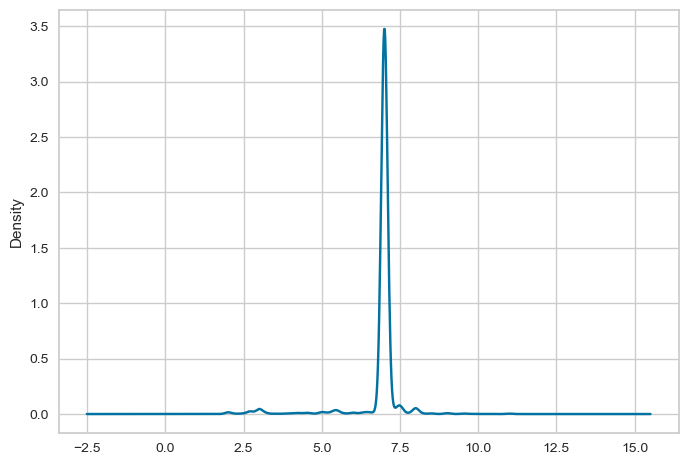

In [12]:

df['pH'].plot(kind ='kde')
print(df['pH'].skew())
print(df['pH'].kurt())

In [13]:
df1.drop(columns = 'seq_id',inplace=True)

In [14]:
num = df1.select_dtypes(include='number')
cat = df1.select_dtypes(exclude='number')

In [15]:
num

pH    tm
0      7.0  75.7
1      7.0  50.5
2      7.0  40.5
3      7.0  47.2
4      7.0  49.5
...    ...   ...
31385  7.0  51.8
31386  7.0  37.2
31387  7.0  64.6
31388  7.0  50.7
31389  7.0  37.6

[28956 rows x 2 columns]

In [16]:
ss =StandardScaler()
ss.fit(num)

StandardScaler()

In [17]:
knn_sc = ss.transform(num)
knn_sc=pd.DataFrame(knn_sc,columns = num.columns)

In [18]:
knn =KNNImputer()
knn.fit(knn_sc)

KNNImputer()

In [29]:
knn_sc[knn_sc['pH'].isna()]

pH        tm
470   NaN  2.706289
5955  NaN  1.860563
5956  NaN  2.830660
5957  NaN  1.305038
5958  NaN  2.639957
...    ..       ...
26364 NaN  0.625141
26365 NaN  0.666598
26366 NaN  0.533935
26367 NaN  0.658306
26658 NaN  1.653278

[286 rows x 2 columns]

In [30]:
num_imp =pd.DataFrame(knn.fit_transform(knn_sc),columns =num.columns)
num_imp

pH        tm
0      0.160349  2.018100
1      0.160349 -0.071339
2      0.160349 -0.900482
3      0.160349 -0.344956
4      0.160349 -0.154254
...         ...       ...
28951  0.160349  0.036449
28952  0.160349 -1.174099
28953  0.160349  1.097752
28954  0.160349 -0.054756
28955  0.160349 -1.140933

[28956 rows x 2 columns]

In [31]:
knn_sc

pH        tm
0      0.160349  2.018100
1      0.160349 -0.071339
2      0.160349 -0.900482
3      0.160349 -0.344956
4      0.160349 -0.154254
...         ...       ...
28951  0.160349  0.036449
28952  0.160349 -1.174099
28953  0.160349  1.097752
28954  0.160349 -0.054756
28955  0.160349 -1.140933

[28956 rows x 2 columns]

In [32]:
cat.reset_index(inplace=True,drop=True)

In [33]:
num_imp

pH        tm
0      0.160349  2.018100
1      0.160349 -0.071339
2      0.160349 -0.900482
3      0.160349 -0.344956
4      0.160349 -0.154254
...         ...       ...
28951  0.160349  0.036449
28952  0.160349 -1.174099
28953  0.160349  1.097752
28954  0.160349 -0.054756
28955  0.160349 -1.140933

[28956 rows x 2 columns]

In [34]:
ff = pd.DataFrame(ss.inverse_transform(num_imp),columns=num.columns)

In [35]:
df1.head(5)

protein_sequence   pH    tm
0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5
3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2
4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5

In [36]:
df2 = pd.concat([cat,ff],axis=1)

In [37]:
df2

protein_sequence   pH    tm
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5
...                                                  ...  ...   ...
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6

[28956 rows x 3 columns]

In [38]:
df2.isna().sum()

protein_sequence    0
pH                  0
tm                  0
dtype: int64

<AxesSubplot:ylabel='Density'>

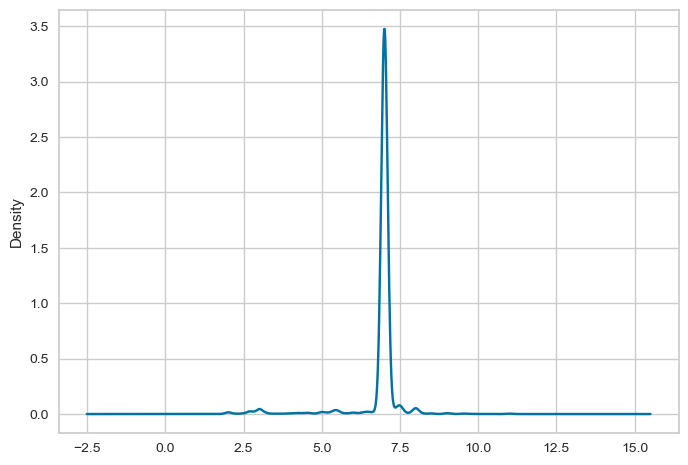

In [39]:
df2['pH'].plot(kind ='kde')


In [40]:
df2.skew()

pH   -3.778553
tm    1.445570
dtype: float64

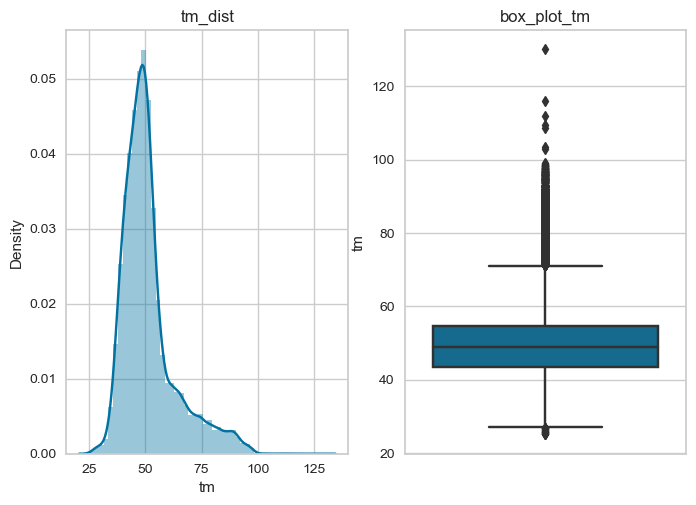

1.4455704545796317
2.233750887278047


In [41]:
plt.subplot(1,2,1)

sns.distplot(df2['tm'])
plt.title('tm_dist')
plt.subplot(1,2,2)
sns.boxplot(y = df2['tm'])
plt.title('box_plot_tm')
plt.show()
print(df2.tm.skew())
print(df2.tm.kurt())

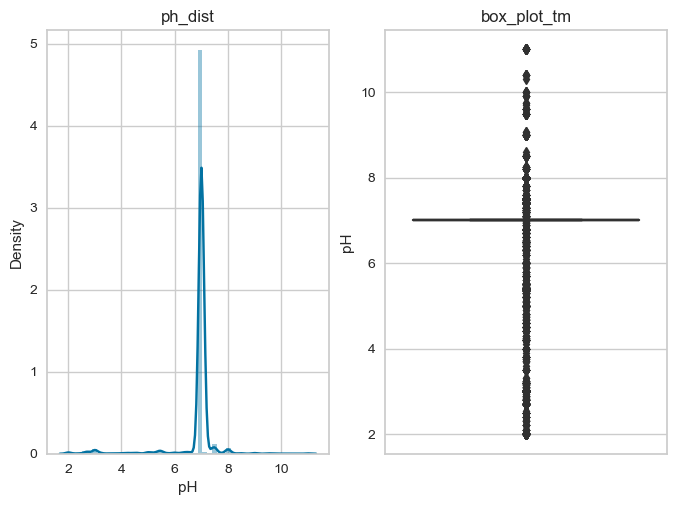

-3.7785533974005516
19.075787085486915


In [42]:
plt.subplot(1,2,1)

sns.distplot(df2['pH'])
plt.title('ph_dist')
plt.subplot(1,2,2)
sns.boxplot(y = df2['pH'])
plt.title('box_plot_tm')
plt.show()
print(df2.pH.skew())
print(df2.pH.kurt())

due to  outliers we can see the +ve skewness we will leave the outliers as the are contextual outliers and its property of that protien

In [43]:
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

In [44]:
df2[((df2 < ll) | (df2 > ul)).any(axis=1)]

protein_sequence   pH    tm
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
16     AALALGLPAFWTALAVGLVLGALAKSLPLFLSEAAERGLGLLGGGL...  7.0  83.0
34     AAVVAAAFLAAGLAQLAESVIPLWQIVLLVGLLLLAGSYLLDRWFG...  7.0  75.0
45     ACVPTPGPRAPAGAPGVPPFPDARFALYLDPEALRQDLPTLPLPAA...  7.0  94.2
63     ADGSPSSSSPTLMVAEHNALLRRGATDSYQIVESISAGQQVKVIDK...  7.0  75.5
...                                                  ...  ...   ...
28896  YNLPVDFYMLDNEPGPASYMARKFFTPDKYKEFVDSCDYITYEFEH...  7.0  76.6
28903  YPLLWAISMSLNPGTSLYSASLIPEKWTFEHYKWLFTSPQSDYLLW...  7.0  74.2
28929  YTAYQGLQARVAALEAQVQGQGEALKALSERVARLEEEVFRTPAEP...  7.0  87.1
28930  YTEFRELVRQGKVAEVTLEETRITGLLKAPERFPTAQGTVQVSRRF...  7.0  82.7
28935  YVAFKGLLEADLDRSLLFYARALAEGRPSPRGEFAFRLAQGGAETK...  7.0  86.0

[5494 rows x 3 columns]

In [45]:
5494/28000
#we will keep the data points we will do transformation along the way 

0.1962142857142857

**Enzymes are composed of one or more polypeptide chains, which are made up of amino acids linked together in a specific sequence. The unique three-dimensional structure of an enzyme allows it to interact with specific molecules (substrates) and catalyze chemical reactions by lowering the activation energy required for those reactions. This catalytic function is a fundamental property of enzymes and is crucial for the proper functioning of living organisms.**


**Enzymes are a type of protein. Enzymes are specialized proteins that act as biological catalysts, facilitating and accelerating chemical reactions in living organisms. They play a fundamental role in various biochemical processes within cells**


**So here we have the data about the protien variant of the enzyme from this each letter denotes a an amino acid  we will derive the properties of the chain from the presenece of amino acids**

**There are 20 standard amino acids that are commonly found in proteins. These amino acids serve as the building blocks for the synthesis of proteins in living organisms. Each amino acid has a unique side chain (also known as the R-group) that imparts specific chemical properties, which play a crucial role in determining the structure and function of the protein.**

In [46]:
df2['protein_sequence'][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

In [47]:
#checking for duplicates

In [48]:
df2[df2.duplicated(keep=False)]



protein_sequence   pH    tm
12197  MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...  7.0  44.1
12198  MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...  7.0  44.1
12200  MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...  7.0  46.9
12201  MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...  7.0  46.9
12409  MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...  2.7  65.8
...                                                  ...  ...   ...
19398  MQRGKVKWFNSEKGYGFIEVEGGSDVFVHFTAIQGEGFKTLEEGQE...  7.0  79.2
24580  MTEFKAGSAKKGATLFKTRCLQCHTVEKGGPHKVGPNLHGIFGRHS...  4.6  62.2
24582  MTEFKAGSAKKGATLFKTRCLQCHTVEKGGPHKVGPNLHGIFGRHS...  4.6  62.2
25973  MVDFAFELRAAQDTGKIVMGARKSIQYAKMGGAKLIIVARNARPDI...  7.4  85.4
25974  MVDFAFELRAAQDTGKIVMGARKSIQYAKMGGAKLIIVARNARPDI...  7.4  85.4

[114 rows x 3 columns]

In [49]:
#removing redudnant data 

In [50]:
df2.drop_duplicates(inplace=True)

<AxesSubplot:>

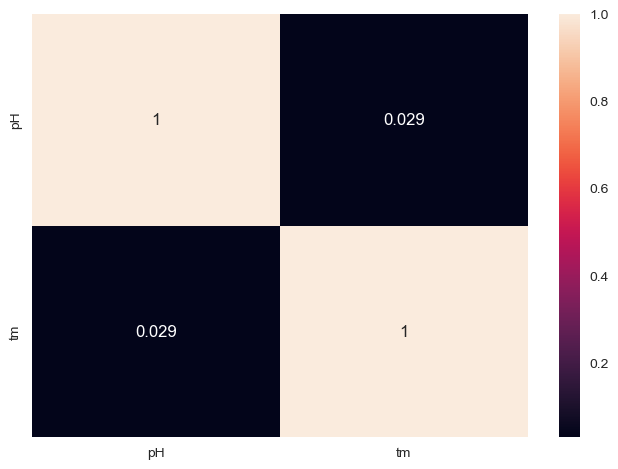

In [51]:

sns.heatmap(df2.corr(),annot=True)



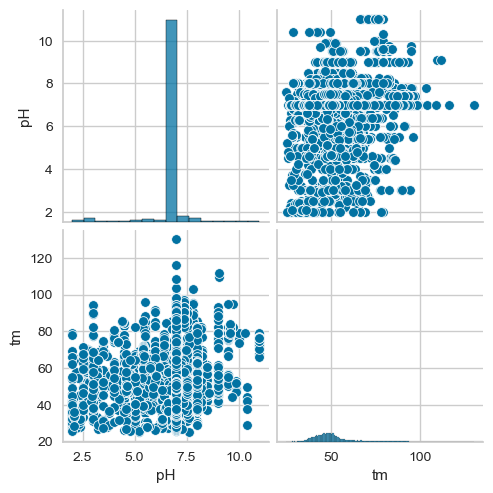

In [52]:
sns.pairplot(df2)

**The ph and and tm are not correlated since as we discussed ph determines the activity not thermostability of the protien
but our goal is to predict the thermostability of a protien at a particular pH 
so to  make the predictions about thermostability we need to derive physical and chemical properties from the
sequence of the aminoacid in the enzyme  and use that as our features for prediction**

**The amino acid sequence is a rich source of information, and it is a critical component in predicting various aspects of protein structure, function, and behavior.** 

# Feature Engineering

## Amino Acid Count

Protein Length: The total count of amino acids in a protein sequence indicates its length. Protein length can be important in various contexts, such as determining the size of the protein, which may be relevant for structural stability or transport within a cell.

Comparative Analysis: Amino acid count can be used for comparative analysis between proteins. Researchers often compare the lengths of proteins in different species or analyze differences in protein lengths between different protein families.

Motif and Domain Prediction: In some cases, the presence of specific amino acid motifs or domains may depend on the count of certain amino acids. For example, protein domains like leucine-rich repeats (LRRs) consist of repeated leucine residues.

Conservation: The count of specific amino acids can also be informative in studies of protein conservation. Some amino acids are highly conserved in certain protein families due to their critical functional roles.

In [53]:
# we are finding dout how many unique amino acids are there in our data 

In [455]:
df2['protein_sequence'].str.split('').explode('protien_sequence').value_counts().drop('')

L    1238328
A     997673
E     943215
S     941918
G     870340
V     846491
K     810208
D     725821
R     698265
I     696225
T     690736
P     654610
Q     570120
N     550356
F     489476
Y     383213
M     304037
H     297520
C     191009
W     144820
Name: protein_sequence, dtype: int64

In [456]:
sorted(df2['protein_sequence'].str.split('').explode('protien_sequence').value_counts().drop('').index)

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [55]:
amino_acid_counts =df2['protein_sequence'].str.split('').explode().value_counts().drop('')
len(amino_acid_counts)
#there 20 unique amino acids in the data 

20

Text(0.5, 0, 'amino_acids')

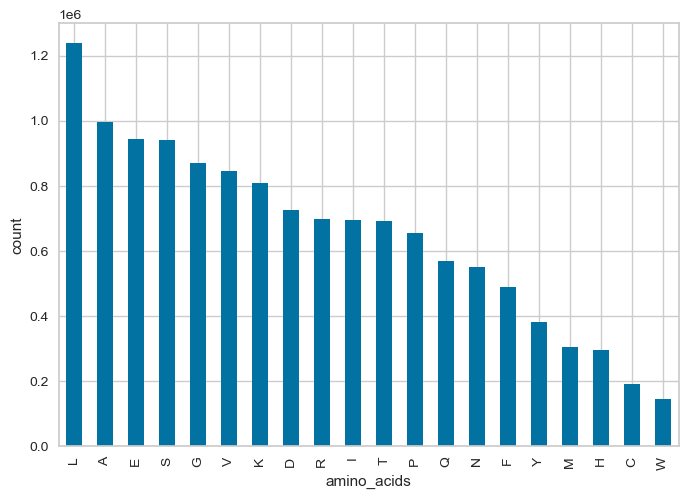

In [56]:
amino_acid_counts.plot(kind ='bar')
plt.ylabel('count')
plt.xlabel('amino_acids')

In [57]:
len(df2['protein_sequence'].iloc[0])

341

## Now we will derive the lenghth protien chain 




In [58]:
df2['protien_length'] = df2['protein_sequence'].apply(lambda x : len(x))

In [59]:
df2

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length  
0                 341  
1                 286  
2                 497  
3                 265  
4                1451  
...               ...  
28951             549  
28952             469  
28953             128  
28954             593  
28955             537  

[28898 rows x 4 columns]

## no we will create a column with ratio of particular amino acid in that protien

**Now based on the structure of the protien sequence we are trying to make features so by knowing 
which amino acids are present in which ratio will help model detect the pattern about thermostability 
with respect to that amino acid. Each Amino acid has its own property some may help in thermostability 
so feeding the model about this structural information will help it in predcting whether presence of that amino acid 
increases or decreases thermostability**


**he ratio of specific amino acids in a protein sequence, especially those involved in the protein's structure and stability, can be relevant for predicting the thermostability of a protein. Protein thermostability is determined by the ability of a protein to maintain its structure and function at high temperatures.**   

**This could help our prediction in the following ways :**

**Hydrophobic Amino Acids: The presence of hydrophobic amino acids (e.g., leucine, isoleucine, valine, phenylalanine) can contribute to protein stability. An increased ratio of hydrophobic amino acids might enhance thermostability by promoting the formation of hydrophobic interactions that stabilize the protein's core.**

**Disulfide Bonds: Cysteine amino acids can form disulfide bonds, which are covalent bonds that contribute to the stability of a protein's structure. A higher ratio of cysteine residues and the potential for disulfide bond formation can be relevant for thermostability.**

**Salt Bridges: Certain amino acids (e.g., lysine and arginine) can participate in the formation of salt bridges, which are electrostatic interactions that contribute to protein stability. The ratio of these amino acids may affect the stability of the protein structure.**

**Secondary Structure Elements: The ratio of amino acids involved in secondary structure elements, such as alpha helices and beta sheets, can influence protein stability. Helix-forming and sheet-forming amino acids may be relevant.**

**Proline and Glycine: Proline and glycine amino acids have unique properties that can influence protein structure and stability. Proline can introduce kinks in secondary structures, while glycine's flexibility can affect loop conformations.**

**Temperature-Adaptive Residues: Some proteins from thermophilic organisms have specific amino acid adaptations that contribute to their thermostability. These adaptations might involve changes in amino acid ratios.**

In [416]:
def amino_acid_ratio(df):
    amino_acid_counts =df2['protein_sequence'].str.split('').explode().value_counts().drop('')

    amino_acids = amino_acid_counts.index
    for i in amino_acids:
        df[i] = df['protein_sequence'].str.count(i)/df['protien_length']
    return df


['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [61]:
amino_acid_ratio(df2)

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         T         P         Q         N         F  \
0      0.108504  ...  0.041056  0.052786  0.017595  0.014663  0.038123   
1      0.045455  ...  0.041958  0.027972  0.076923  0.020979  0.020979   
2      0.060362  ...  0.060362  0.040241  0.050302  0.030181  0.042254   
3      0.052830  ...  0.071698  0.060377  0.033962  0.033962  0.045283   
4      0.085458  ...  0.082702  0.088215  0.037216  0.044797  0.022054   
...         ...  ...       ...       ...       ...       ...       ...   
28951  0.076503  ...  0.032787  0.045537  0.043716  0.043716  0.032787   
28952  0.072495  ...  0.055437  0.040512  0.034115  0.040512  0.046908   
28953  0.054688  ...  0.046875  0.046875  0.062500  0.039062  0.054688   
28954  0.080944  ...  0.053963  0.052277  0.020236  0.042159  0.038786   
28955  0.070764  ...  0.054004  0.057728  0.033520  0.037244  0.048417   

              Y         M         H         C         W  
0      0.008798  0.023460  0.008798  0.002933  0.011730  
1      0.010490  0.006993  0.013986  0.000000  0.010490  
2      0.032193  0.012072  0.022133  0.018109  0.006036  
3      0.015094  0.007547  0.026415  0.018868  0.011321  
4      0.032391  0.021365  0.027567  0.009649  0.011027  
...         ...       ...       ...       ...       ...  
28951  0.032787  0.023679  0.027322  0.021858  0.023679  
28952  0.029851  0.029851  0.046908  0.010661  0.010661  
28953  0.031250  0.054688  0.015625  0.007812  0.031250  
28954  0.030354  0.043845  0.018550  0.008432  0.005059  
28955  0.054004  0.013035  0.039106  0.009311  0.033520  

[28898 rows x 24 columns]

In [62]:
df2.shape

(28898, 24)

**In Biopython, the ProteinAnalysis class within the Bio.SeqUtils.ProtParam module allows us to perform various calculations and analyses on protein sequences.**


In [63]:
# PhysioChemical Properties of Amino acids
#!pip install biopython
from Bio.SeqUtils.ProtParam import ProteinAnalysis



In [64]:
df2.loc[0][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

# Detail about the PhysioChemical Properties we are going to derive 

**Aromaticity: Aromaticity can be related to the presence of aromatic amino acids (e.g., phenylalanine, tyrosine, tryptophan) in a protein. These amino acids play essential roles in ligand binding and protein-protein interactions, making aromaticity a relevant property in some contexts.**

**Molecular Weight: Molecular weight provides information about the mass of a protein. It can be relevant when studying protein purification, quantification, or analyzing the overall size of a protein.**

**Instability Index: The instability index measures the stability of a protein. Higher instability index values suggest that a protein is less stable. It can be useful when assessing the potential stability of a protein under various conditions.**

**Hydrophobicity (GRAVY): The GRAVY score measures the overall hydrophobicity of a protein. It can be relevant when studying membrane proteins, protein-lipid interactions, or assessing the solubility of a protein.**

**Isoelectric Point (pI): The isoelectric point is the pH at which a protein carries no net electric charge. It's crucial when studying protein separation by techniques like isoelectric focusing or when understanding protein behavior under different pH conditions.**

**Charge: The charge of a protein at a specific pH can be relevant in various contexts, including protein-protein interactions and enzymatic activity. Different pH levels can affect the charge state of amino acid residues and influence protein behavior.**

In [65]:
# PhysioChemical Properties of Amino acids
        
    #Aromaticity
def calculate_aromaticity(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.aromaticity()
  
  #Molecular Weight
def calculate_molecular_weight(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.molecular_weight()
  
  #Instability Index
def calculate_instability_index(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.instability_index()
  
  #Hydrophobicity
def calculate_hydrophobicity(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.gravy(scale='KyteDoolitle')
  
  #Isoelectric Point
def calculate_isoelectric_point(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.isoelectric_point()
  
  #Charge
def calculate_charge1(row):
    sequence = str(row[0])
    X = ProteinAnalysis(sequence)
    return "%0.2f" % X.charge_at_pH(row[1])

In [66]:
df2['Aromaticity'] = df2.apply(calculate_aromaticity, axis=1)
df2['Molecular Weight'] = df2.apply(calculate_molecular_weight, axis=1)
df2['Instability Index'] = df2.apply(calculate_instability_index, axis=1)
df2['Hydrophobicity'] = df2.apply(calculate_hydrophobicity, axis=1)
df2['Isoelectric Point'] = df2.apply(calculate_isoelectric_point, axis=1)
df2['Charge'] = df2.apply(calculate_charge1, axis=1)

In [67]:
 df2.apply(calculate_charge, axis=1)

NameError: name 'calculate_charge' is not defined

In [68]:
ProteinAnalysis(df2.iloc[0,0]).charge_at_pH(7.0)

-1.8728511025479264

In [79]:
df2

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         M         H         C         W  Aromaticity  \
0      0.108504  ...  0.023460  0.008798  0.002933  0.011730         0.06   
1      0.045455  ...  0.006993  0.013986  0.000000  0.010490         0.04   
2      0.060362  ...  0.012072  0.022133  0.018109  0.006036         0.08   
3      0.052830  ...  0.007547  0.026415  0.018868  0.011321         0.07   
4      0.085458  ...  0.021365  0.027567  0.009649  0.011027         0.07   
...         ...  ...       ...       ...       ...       ...          ...   
28951  0.076503  ...  0.023679  0.027322  0.021858  0.023679         0.09   
28952  0.072495  ...  0.029851  0.046908  0.010661  0.010661         0.09   
28953  0.054688  ...  0.054688  0.015625  0.007812  0.031250         0.12   
28954  0.080944  ...  0.043845  0.018550  0.008432  0.005059         0.07   
28955  0.070764  ...  0.013035  0.039106  0.009311  0.033520         0.14   

       Molecular Weight  Instability Index  Hydrophobicity  Isoelectric Point  \
0              36320.72              28.39            0.15               6.11   
1              32837.99              65.11           -1.09               5.14   
2              53428.80              35.09           -0.71               9.03   
3              29475.60              50.50           -0.51               4.68   
4             158761.98              45.67           -0.40               5.92   
...                 ...                ...             ...                ...   
28951          61997.62              48.60           -0.54               8.47   
28952          52637.69              35.29           -0.10               6.53   
28953          14203.92              44.20           -0.33               5.27   
28954          64367.87              36.62           -0.14               5.69   
28955          62272.39              43.21            0.07               7.14   

       Charge  
0       -1.87  
1      -12.72  
2       11.73  
3      -20.56  
4      -21.66  
...       ...  
28951    6.03  
28952   -3.30  
28953   -3.06  
28954   -9.24  
28955    0.60  

[28898 rows x 30 columns]

**We derived all these features from biopython using protien sequence and using these new features along with ph we will try to predict the thermostability**


In [245]:
df2

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         M         H         C         W  Aromaticity  \
0      0.108504  ...  0.023460  0.008798  0.002933  0.011730         0.06   
1      0.045455  ...  0.006993  0.013986  0.000000  0.010490         0.04   
2      0.060362  ...  0.012072  0.022133  0.018109  0.006036         0.08   
3      0.052830  ...  0.007547  0.026415  0.018868  0.011321         0.07   
4      0.085458  ...  0.021365  0.027567  0.009649  0.011027         0.07   
...         ...  ...       ...       ...       ...       ...          ...   
28951  0.076503  ...  0.023679  0.027322  0.021858  0.023679         0.09   
28952  0.072495  ...  0.029851  0.046908  0.010661  0.010661         0.09   
28953  0.054688  ...  0.054688  0.015625  0.007812  0.031250         0.12   
28954  0.080944  ...  0.043845  0.018550  0.008432  0.005059         0.07   
28955  0.070764  ...  0.013035  0.039106  0.009311  0.033520         0.14   

       Molecular Weight  Instability Index  Hydrophobicity  Isoelectric Point  \
0              36320.72              28.39            0.15               6.11   
1              32837.99              65.11           -1.09               5.14   
2              53428.80              35.09           -0.71               9.03   
3              29475.60              50.50           -0.51               4.68   
4             158761.98              45.67           -0.40               5.92   
...                 ...                ...             ...                ...   
28951          61997.62              48.60           -0.54               8.47   
28952          52637.69              35.29           -0.10               6.53   
28953          14203.92              44.20           -0.33               5.27   
28954          64367.87              36.62           -0.14               5.69   
28955          62272.39              43.21            0.07               7.14   

       Charge  
0       -1.87  
1      -12.72  
2       11.73  
3      -20.56  
4      -21.66  
...       ...  
28951    6.03  
28952   -3.30  
28953   -3.06  
28954   -9.24  
28955    0.60  

[28898 rows x 30 columns]

df2.to_csv('Enzyme_Final_With_Features.csv')

# Before going for Model Building We will do some EDA again to obtain information about how the new features affect our target 

In [247]:
df2

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         M         H         C         W  Aromaticity  \
0      0.108504  ...  0.023460  0.008798  0.002933  0.011730         0.06   
1      0.045455  ...  0.006993  0.013986  0.000000  0.010490         0.04   
2      0.060362  ...  0.012072  0.022133  0.018109  0.006036         0.08   
3      0.052830  ...  0.007547  0.026415  0.018868  0.011321         0.07   
4      0.085458  ...  0.021365  0.027567  0.009649  0.011027         0.07   
...         ...  ...       ...       ...       ...       ...          ...   
28951  0.076503  ...  0.023679  0.027322  0.021858  0.023679         0.09   
28952  0.072495  ...  0.029851  0.046908  0.010661  0.010661         0.09   
28953  0.054688  ...  0.054688  0.015625  0.007812  0.031250         0.12   
28954  0.080944  ...  0.043845  0.018550  0.008432  0.005059         0.07   
28955  0.070764  ...  0.013035  0.039106  0.009311  0.033520         0.14   

       Molecular Weight  Instability Index  Hydrophobicity  Isoelectric Point  \
0              36320.72              28.39            0.15               6.11   
1              32837.99              65.11           -1.09               5.14   
2              53428.80              35.09           -0.71               9.03   
3              29475.60              50.50           -0.51               4.68   
4             158761.98              45.67           -0.40               5.92   
...                 ...                ...             ...                ...   
28951          61997.62              48.60           -0.54               8.47   
28952          52637.69              35.29           -0.10               6.53   
28953          14203.92              44.20           -0.33               5.27   
28954          64367.87              36.62           -0.14               5.69   
28955          62272.39              43.21            0.07               7.14   

       Charge  
0       -1.87  
1      -12.72  
2       11.73  
3      -20.56  
4      -21.66  
...       ...  
28951    6.03  
28952   -3.30  
28953   -3.06  
28954   -9.24  
28955    0.60  

[28898 rows x 30 columns]

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28898 entries, 0 to 28955
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   protein_sequence   28898 non-null  object 
 1   pH                 28898 non-null  float64
 2   tm                 28898 non-null  float64
 3   protien_length     28898 non-null  int64  
 4   L                  28898 non-null  float64
 5   A                  28898 non-null  float64
 6   E                  28898 non-null  float64
 7   S                  28898 non-null  float64
 8   G                  28898 non-null  float64
 9   V                  28898 non-null  float64
 10  K                  28898 non-null  float64
 11  D                  28898 non-null  float64
 12  R                  28898 non-null  float64
 13  I                  28898 non-null  float64
 14  T                  28898 non-null  float64
 15  P                  28898 non-null  float64
 16  Q                  288

In [2]:
df3 = df2.copy()

NameError: name 'df2' is not defined

In [3]:
df3 = pd.read_csv('Enzyme_Final_With_Features.csv',index_col=0)

In [4]:
df3

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         M         H         C         W  Aromaticity  \
0      0.108504  ...  0.023460  0.008798  0.002933  0.011730         0.06   
1      0.045455  ...  0.006993  0.013986  0.000000  0.010490         0.04   
2      0.060362  ...  0.012072  0.022133  0.018109  0.006036         0.08   
3      0.052830  ...  0.007547  0.026415  0.018868  0.011321         0.07   
4      0.085458  ...  0.021365  0.027567  0.009649  0.011027         0.07   
...         ...  ...       ...       ...       ...       ...          ...   
28951  0.076503  ...  0.023679  0.027322  0.021858  0.023679         0.09   
28952  0.072495  ...  0.029851  0.046908  0.010661  0.010661         0.09   
28953  0.054688  ...  0.054688  0.015625  0.007812  0.031250         0.12   
28954  0.080944  ...  0.043845  0.018550  0.008432  0.005059         0.07   
28955  0.070764  ...  0.013035  0.039106  0.009311  0.033520         0.14   

       Molecular Weight  Instability Index  Hydrophobicity  Isoelectric Point  \
0              36320.72              28.39            0.15               6.11   
1              32837.99              65.11           -1.09               5.14   
2              53428.80              35.09           -0.71               9.03   
3              29475.60              50.50           -0.51               4.68   
4             158761.98              45.67           -0.40               5.92   
...                 ...                ...             ...                ...   
28951          61997.62              48.60           -0.54               8.47   
28952          52637.69              35.29           -0.10               6.53   
28953          14203.92              44.20           -0.33               5.27   
28954          64367.87              36.62           -0.14               5.69   
28955          62272.39              43.21            0.07               7.14   

       Charge  
0       -1.87  
1      -12.72  
2       11.73  
3      -20.56  
4      -21.66  
...       ...  
28951    6.03  
28952   -3.30  
28953   -3.06  
28954   -9.24  
28955    0.60  

[28898 rows x 30 columns]

In [77]:
df3 = df3.drop(columns ='protein_sequence')

In [78]:
for i in df3.columns:
    df3[i] = pd.to_numeric(df3[i])

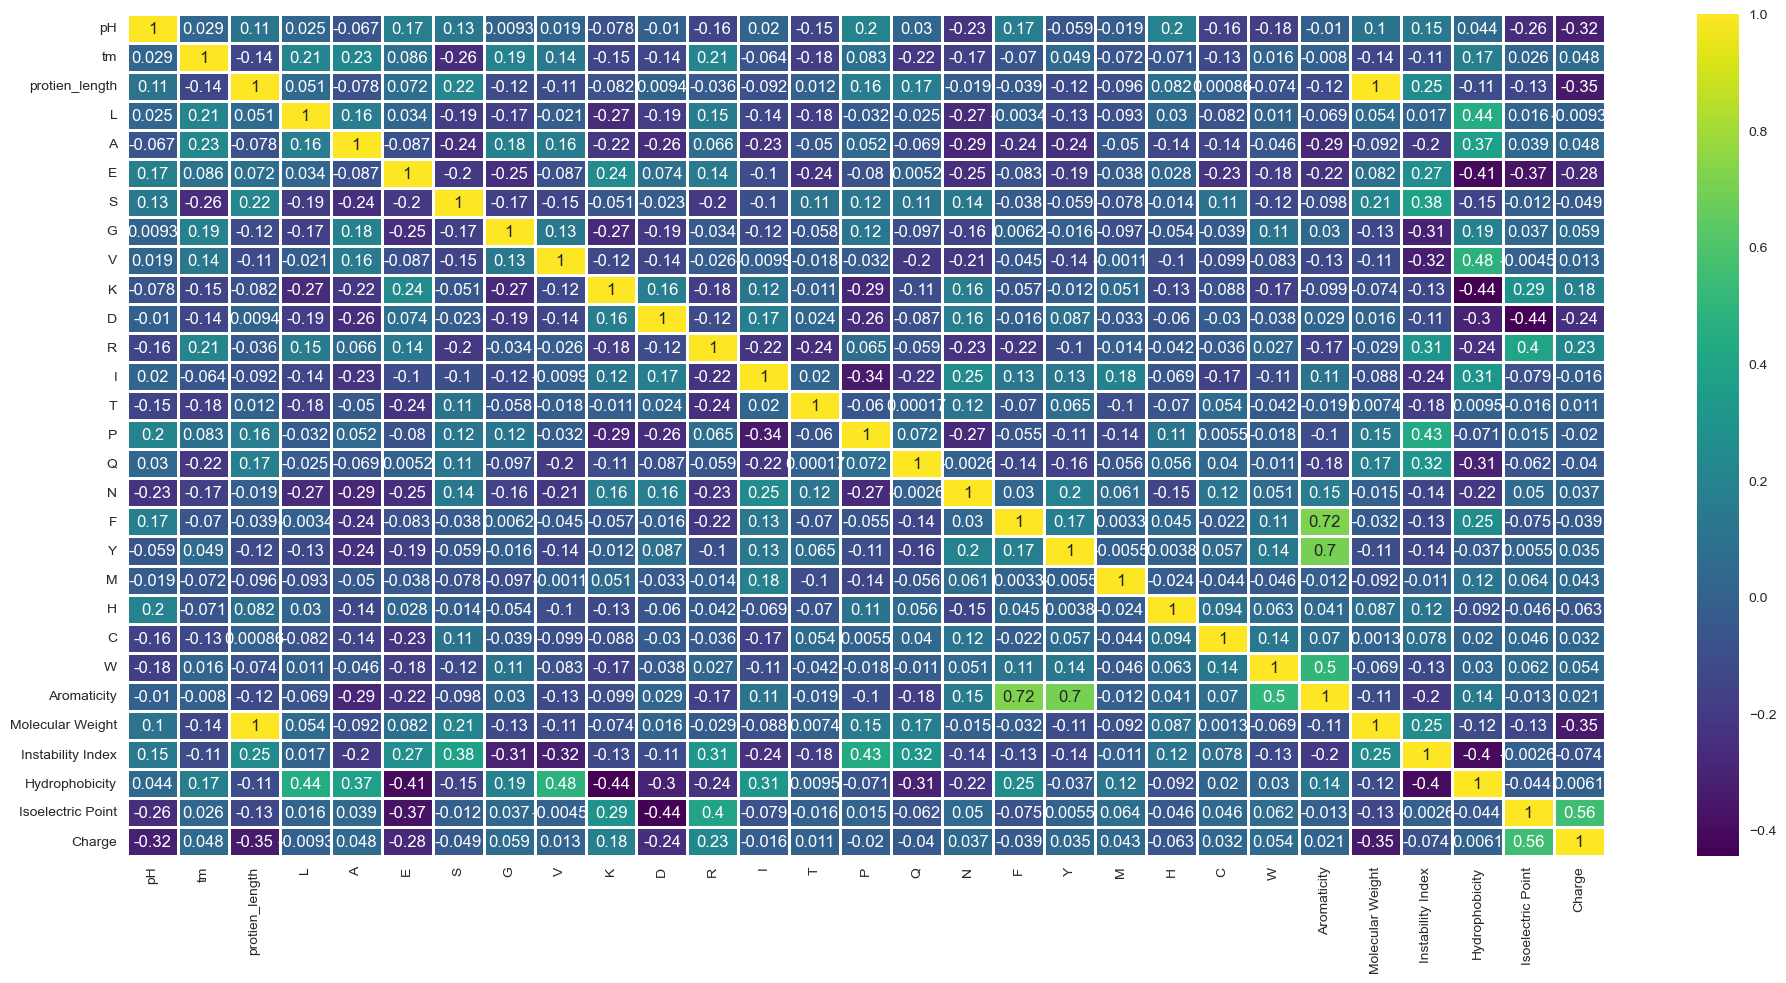

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(),annot=True,cmap='viridis',linewidths=.75)
plt.tight_layout()
plt.show()

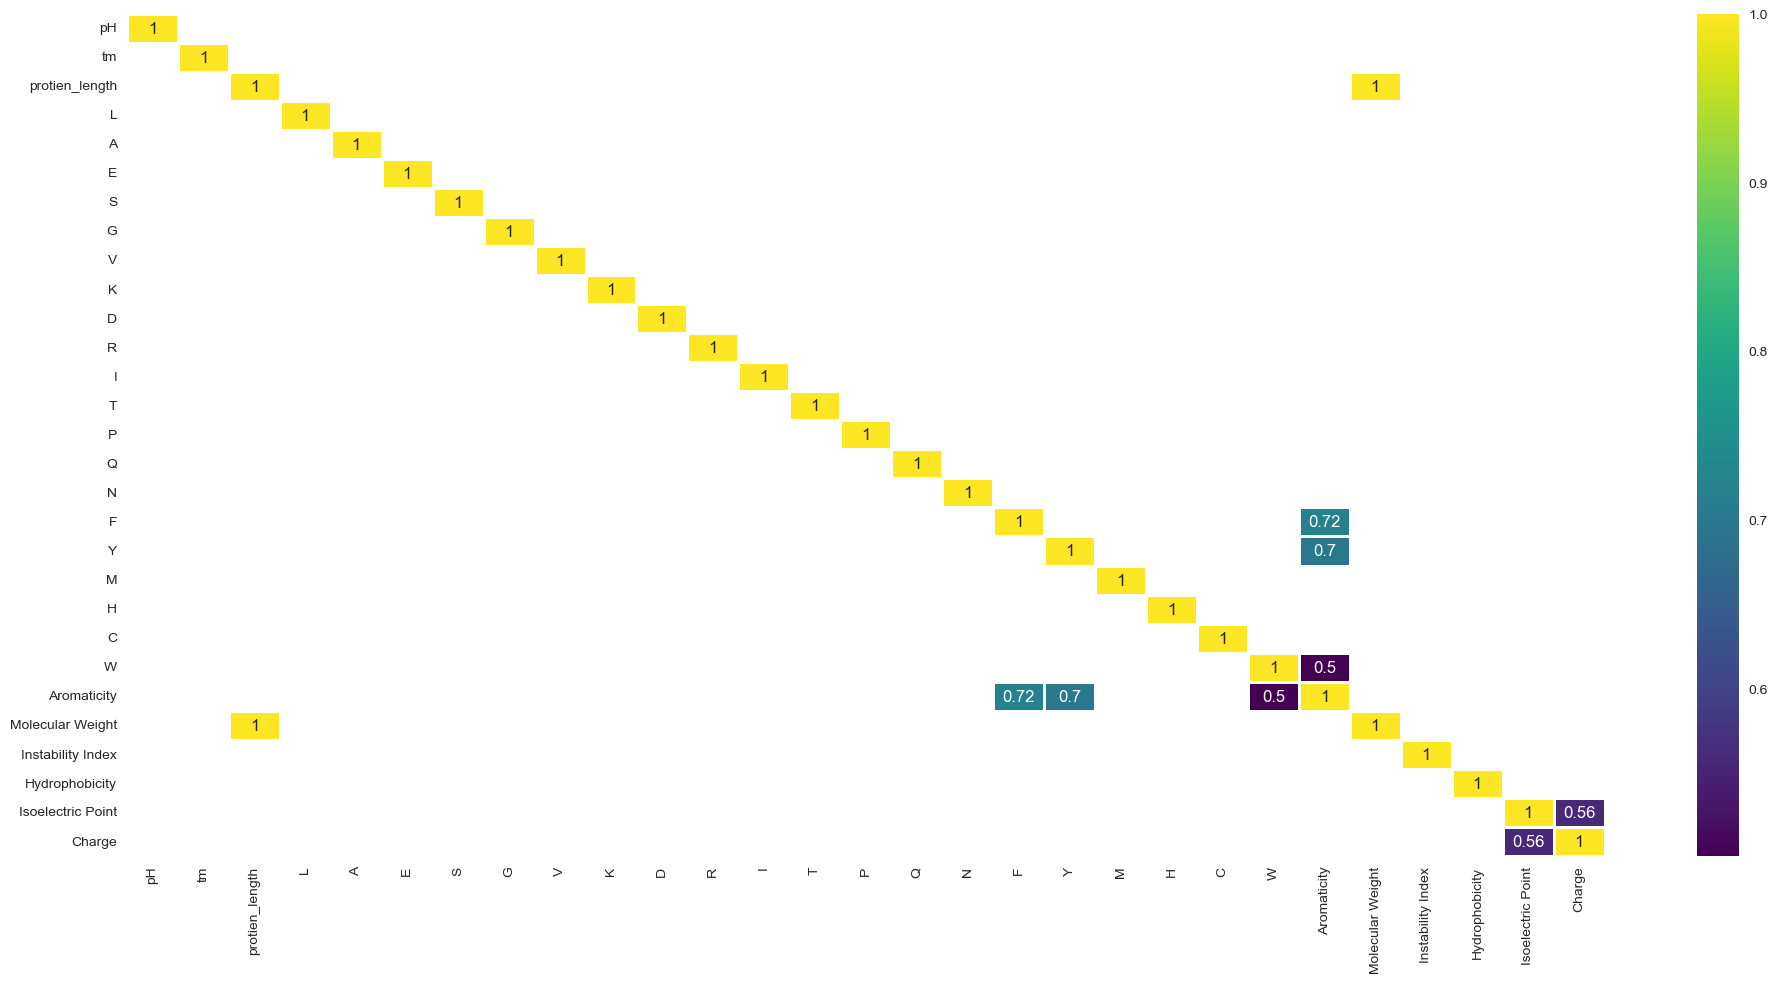

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr()[(df3.corr() < -0.50) | (df3.corr() > 0.50)],annot=True,cmap='viridis',linewidths=.75)
plt.tight_layout()
plt.show()

In [81]:
# as we can see that there is not much ecivdent correlation between our trarget tm and other features 
#also there are some features that shows multicollinearity but that is armotacity with amino acid ratio 
#still the correlation is less. we need to rely on complex models to capture the pattern clearly

**The correlation between protein length and molecular weight is expected because they are related properties. Protein length represents the number of amino acids in the sequence, and molecular weight is calculated based on the sum of the atomic weights of the constituent amino acids. Longer proteins will generally have a higher molecular weight.**

**Also both have same correlation with tm so we will drop one to prevent multicollinaerity**

**we have derived protien specific ratios from protien length so we have captured information regarding 
so we will drop the protien length**

In [82]:
df3.columns

Index(['pH', 'tm', 'protien_length', 'L', 'A', 'E', 'S', 'G', 'V', 'K', 'D',
       'R', 'I', 'T', 'P', 'Q', 'N', 'F', 'Y', 'M', 'H', 'C', 'W',
       'Aromaticity', 'Molecular Weight', 'Instability Index',
       'Hydrophobicity', 'Isoelectric Point', 'Charge'],
      dtype='object')

In [83]:
sel = ['tm','pH', 'protien_length','Aromaticity', 'Molecular Weight', 'Instability Index',
       'Hydrophobicity', 'Isoelectric Point', 'Charge']

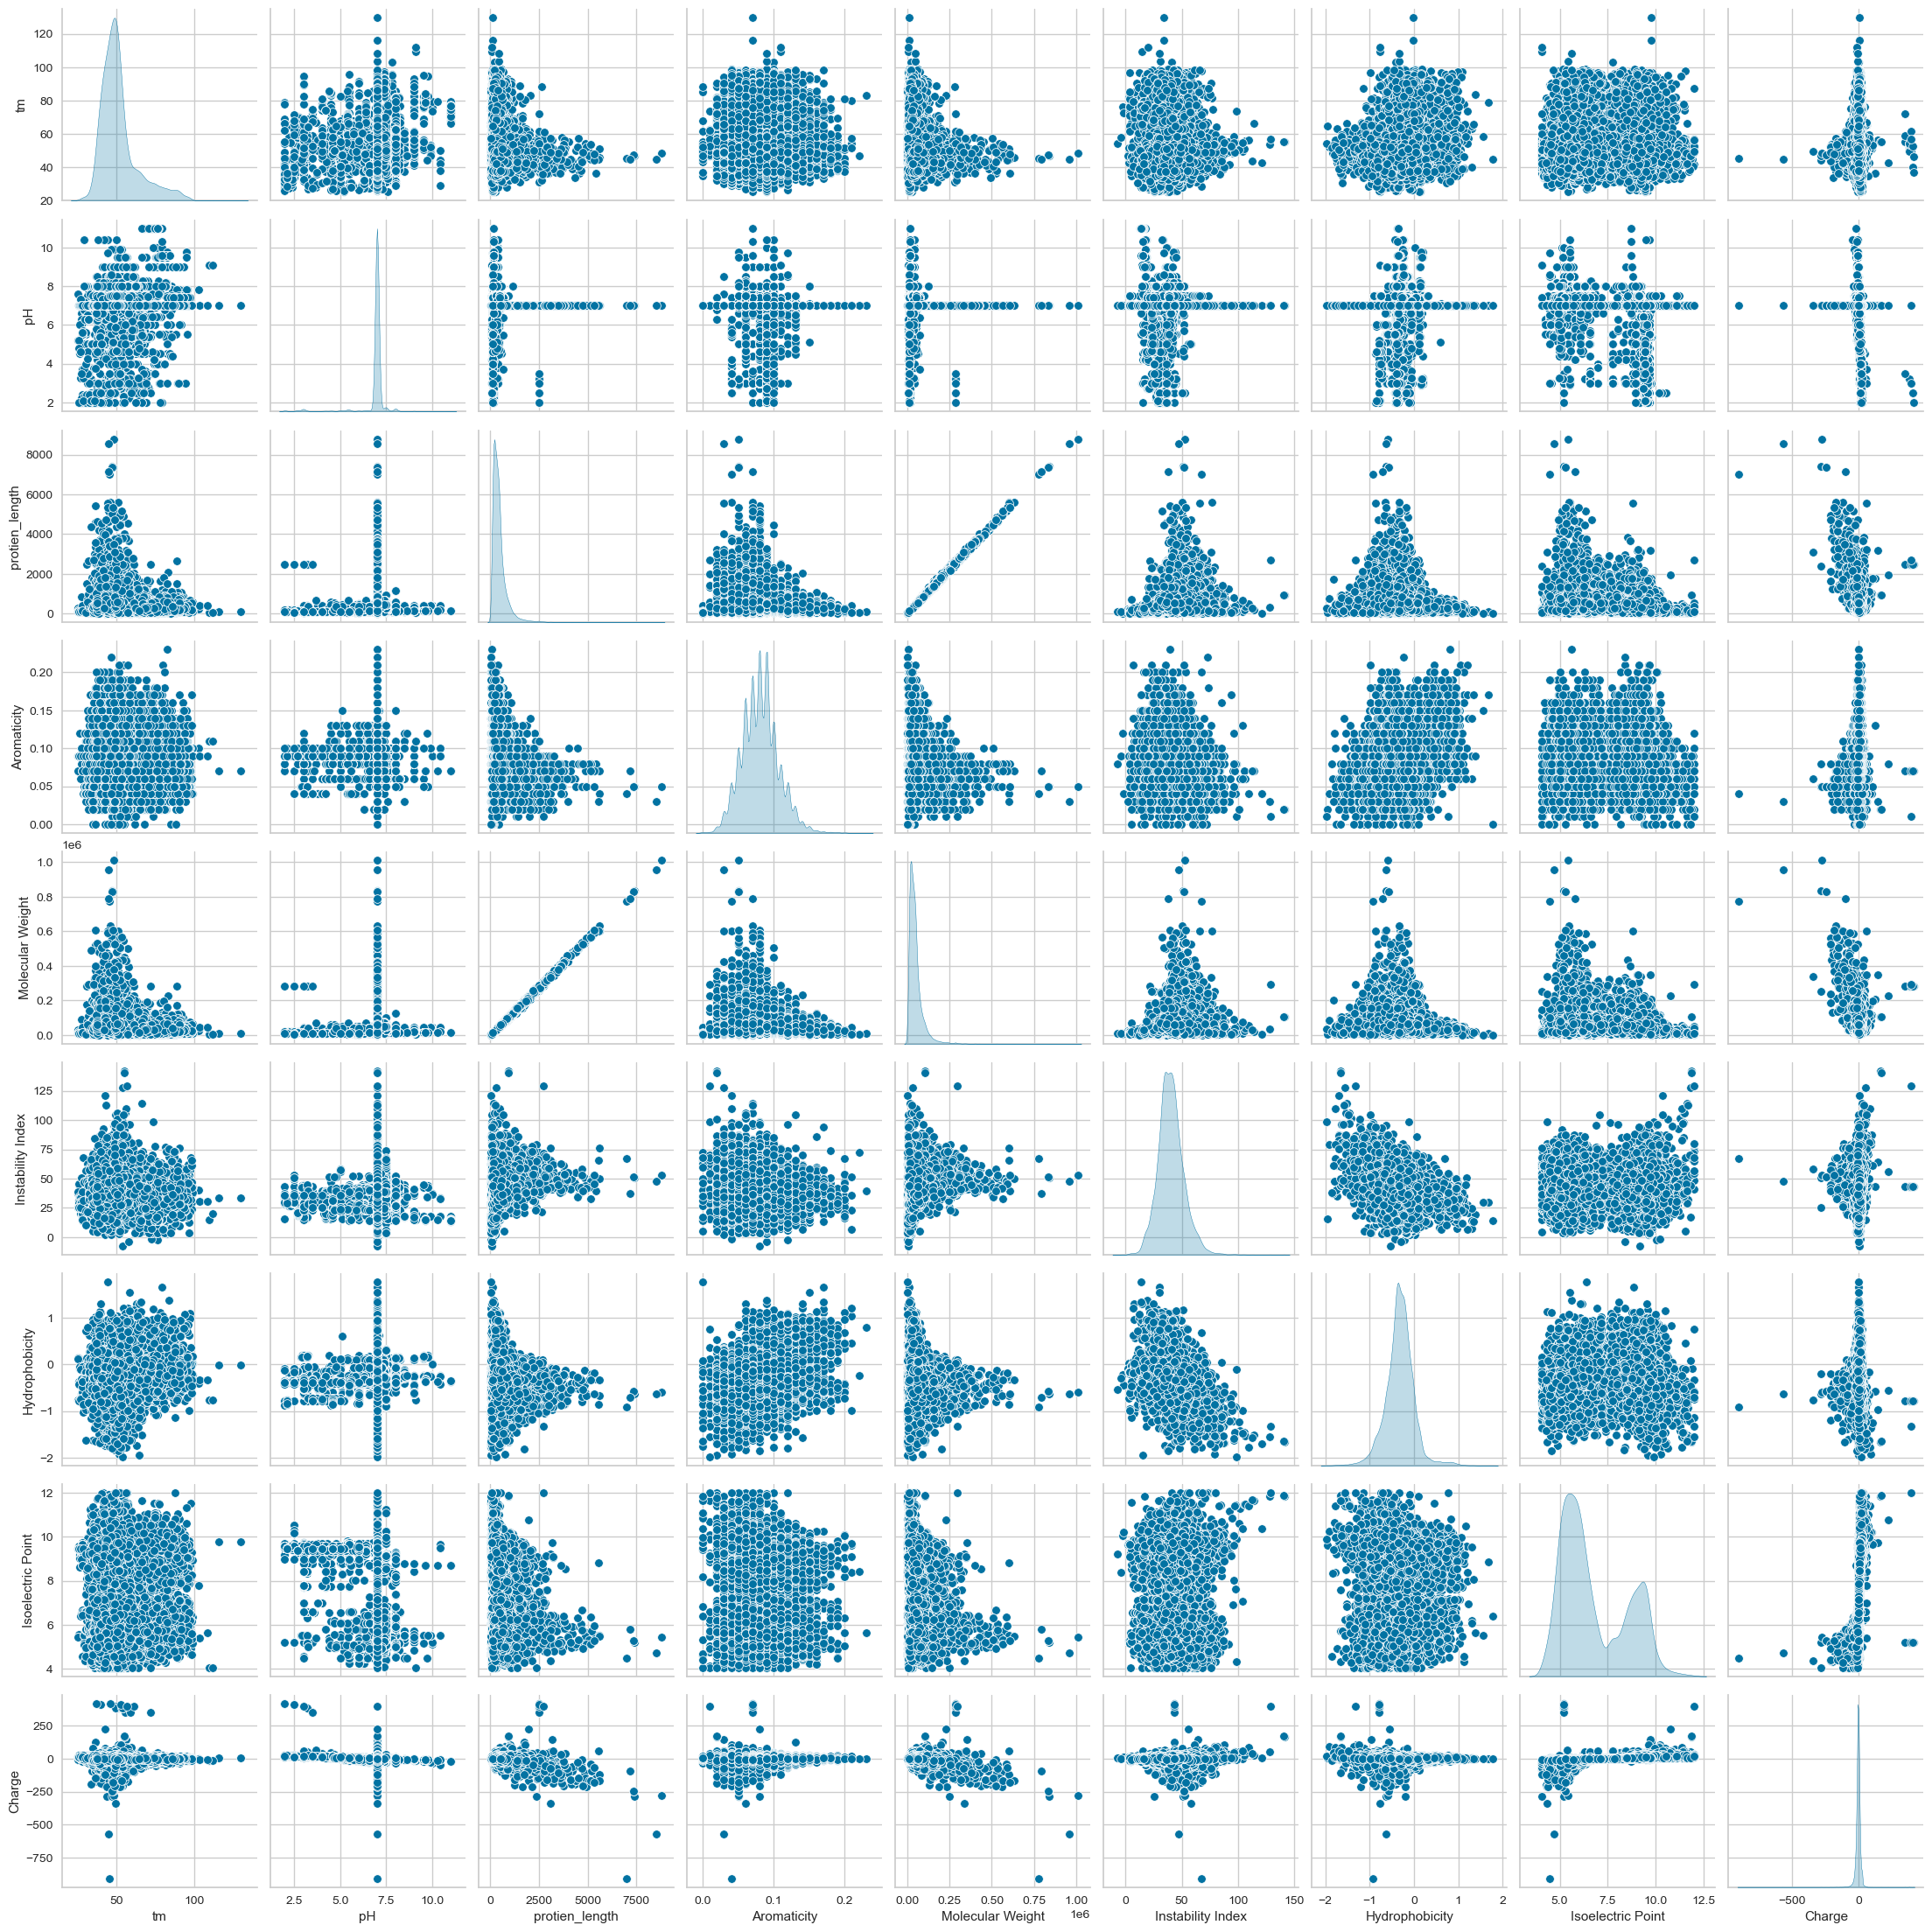

In [84]:
sns.pairplot(df3[sel],diag_kind='kde')

In [85]:
#the scatter plot proves the point from heat map

In [86]:
df3.drop(columns = 'protien_length',inplace=True)

In [87]:
df3.skew()

pH                  -3.794619
tm                   1.449259
L                    0.729612
A                    0.749080
E                    0.645672
S                    0.718790
G                    1.737351
V                    0.503596
K                    0.937667
D                    0.567522
R                    0.960027
I                    0.637534
T                    0.966382
P                    1.403389
Q                    1.496170
N                    0.866666
F                    0.794272
Y                    0.887176
M                    1.053542
H                    0.968948
C                    2.331495
W                    1.168298
Aromaticity          0.382813
Molecular Weight     4.731779
Instability Index    0.562111
Hydrophobicity       0.166308
Isoelectric Point    0.613616
Charge              -0.946396
dtype: float64

In [88]:
df3.shape

(28898, 28)

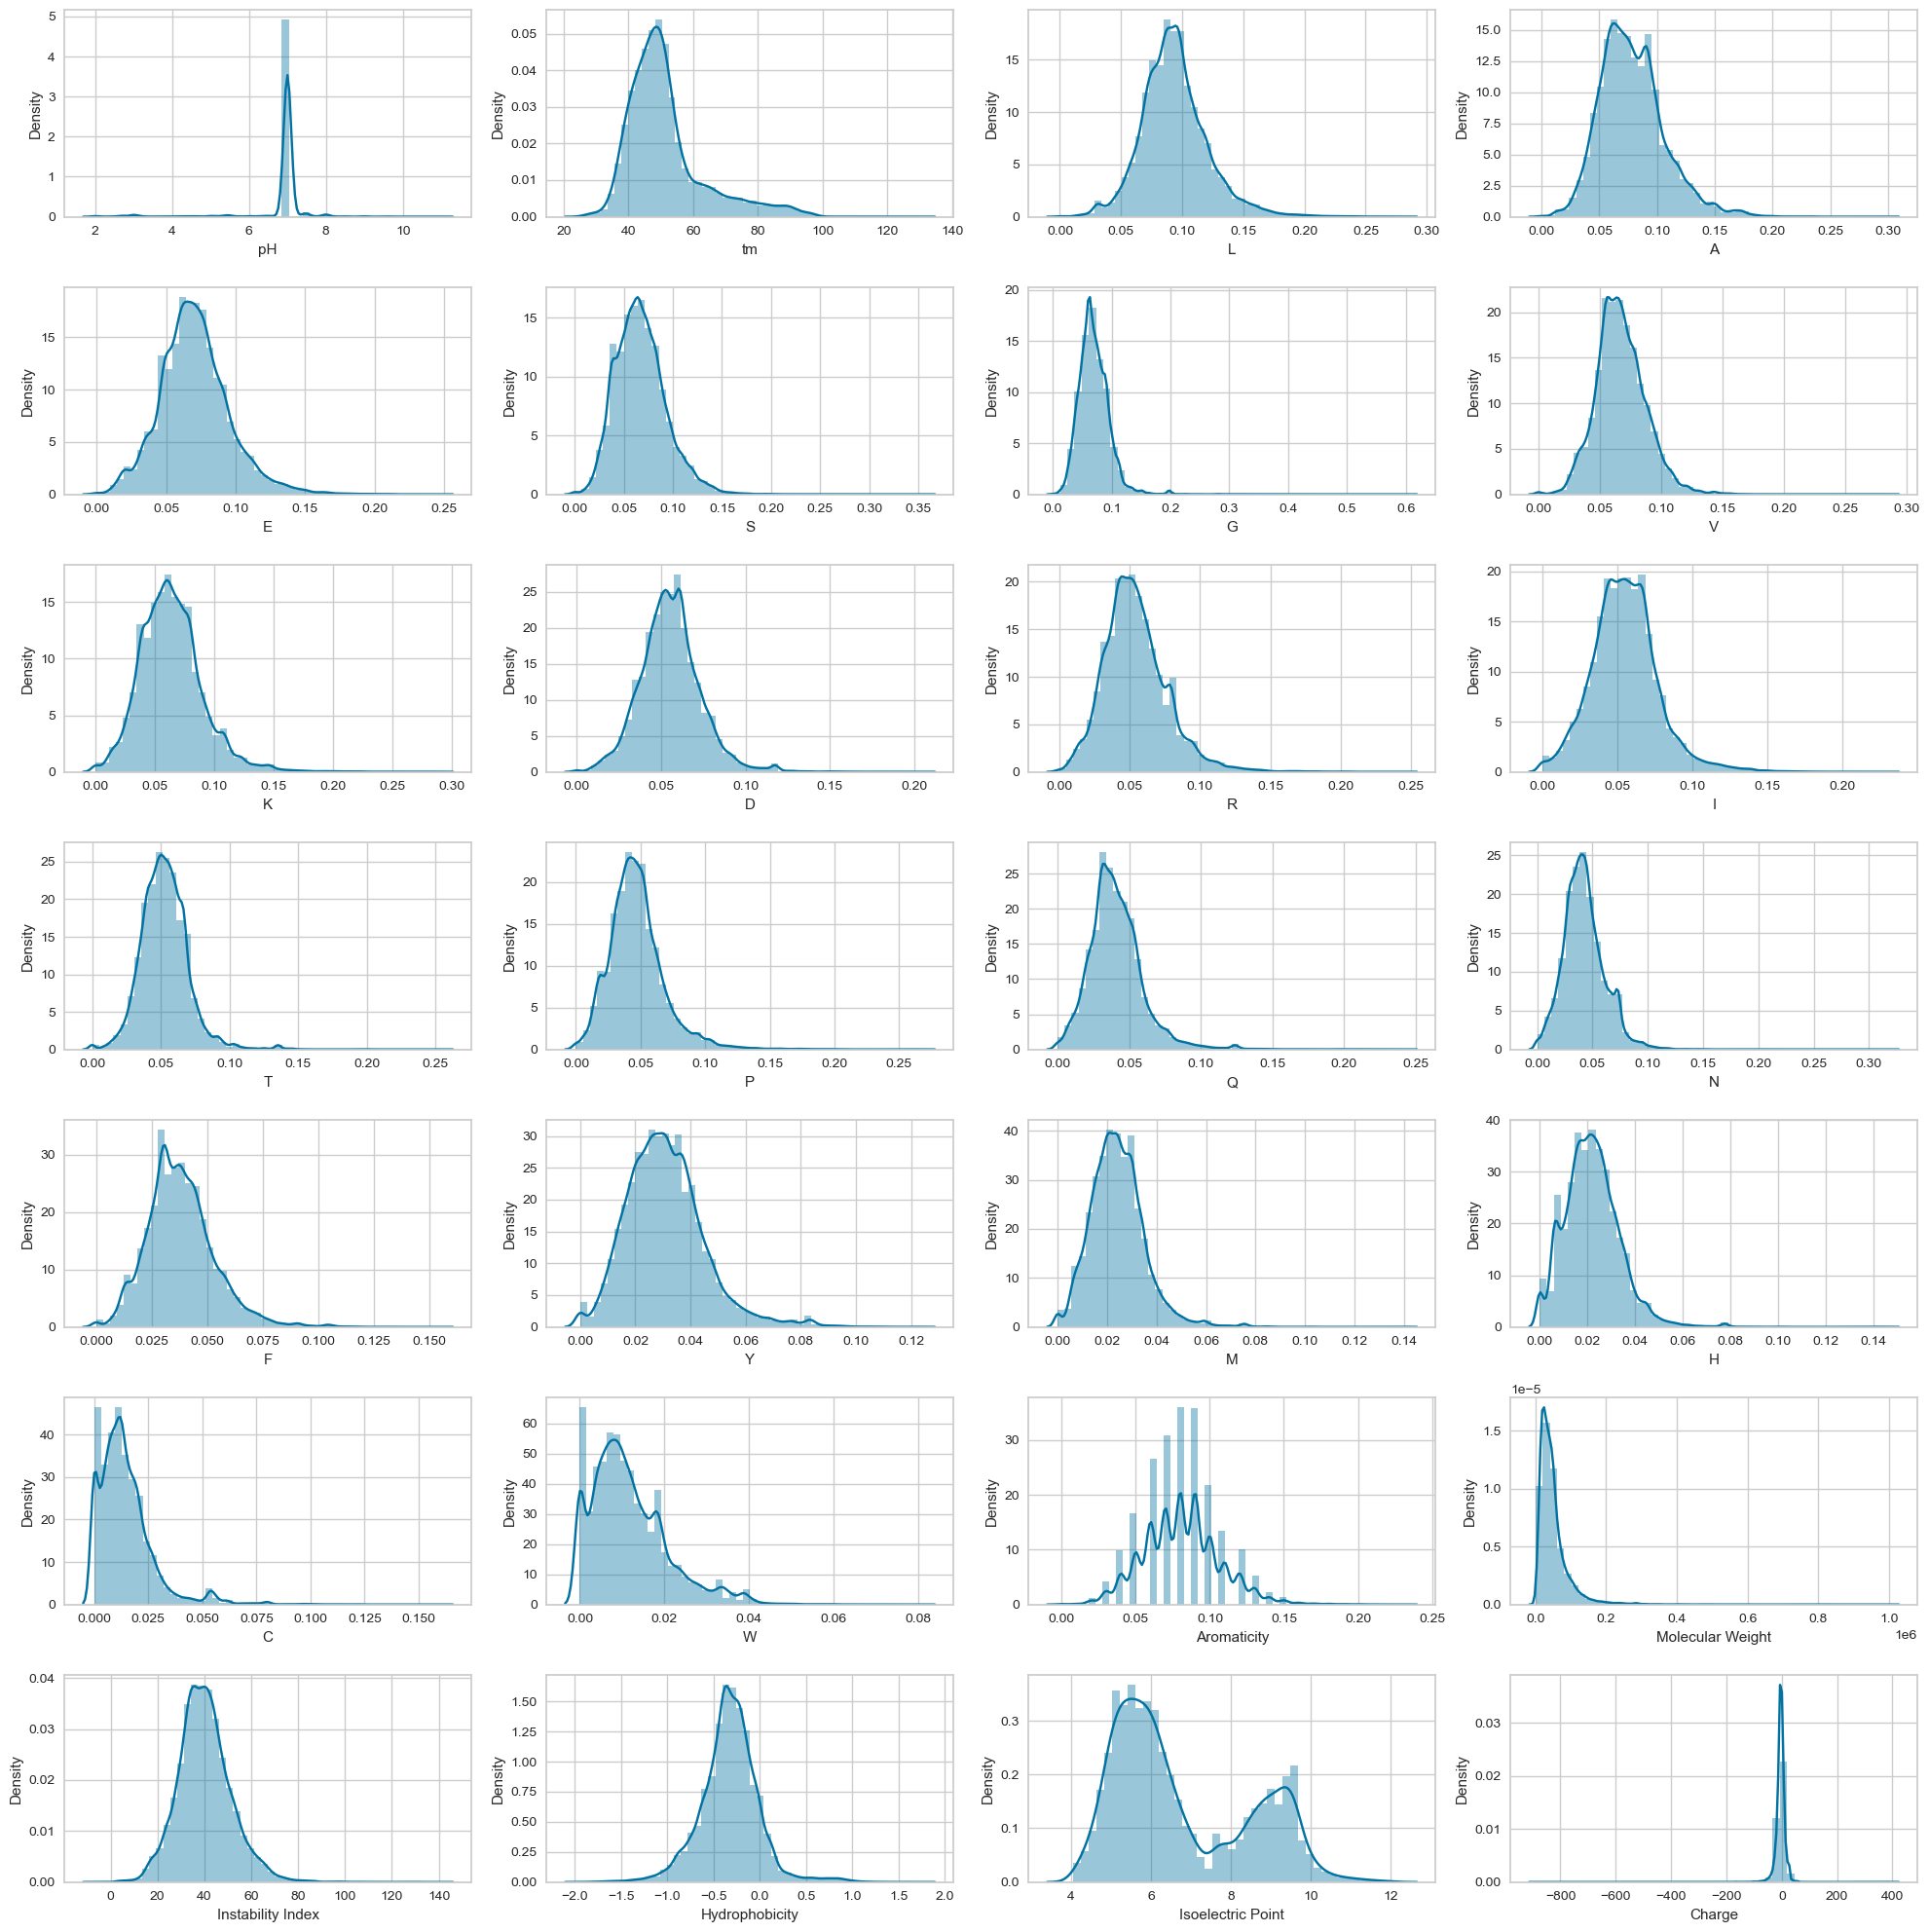

In [89]:
plt.figure(figsize=(20,20))
j = 1
for i in df3.columns:    
    plt.subplot(7,4,j)
    j +=1
    sns.distplot(df3[i])
plt.tight_layout()    
plt.show()

### Now we will go for model building
our target is tm, and all our columns are numeric we can tryout diff regression techniques

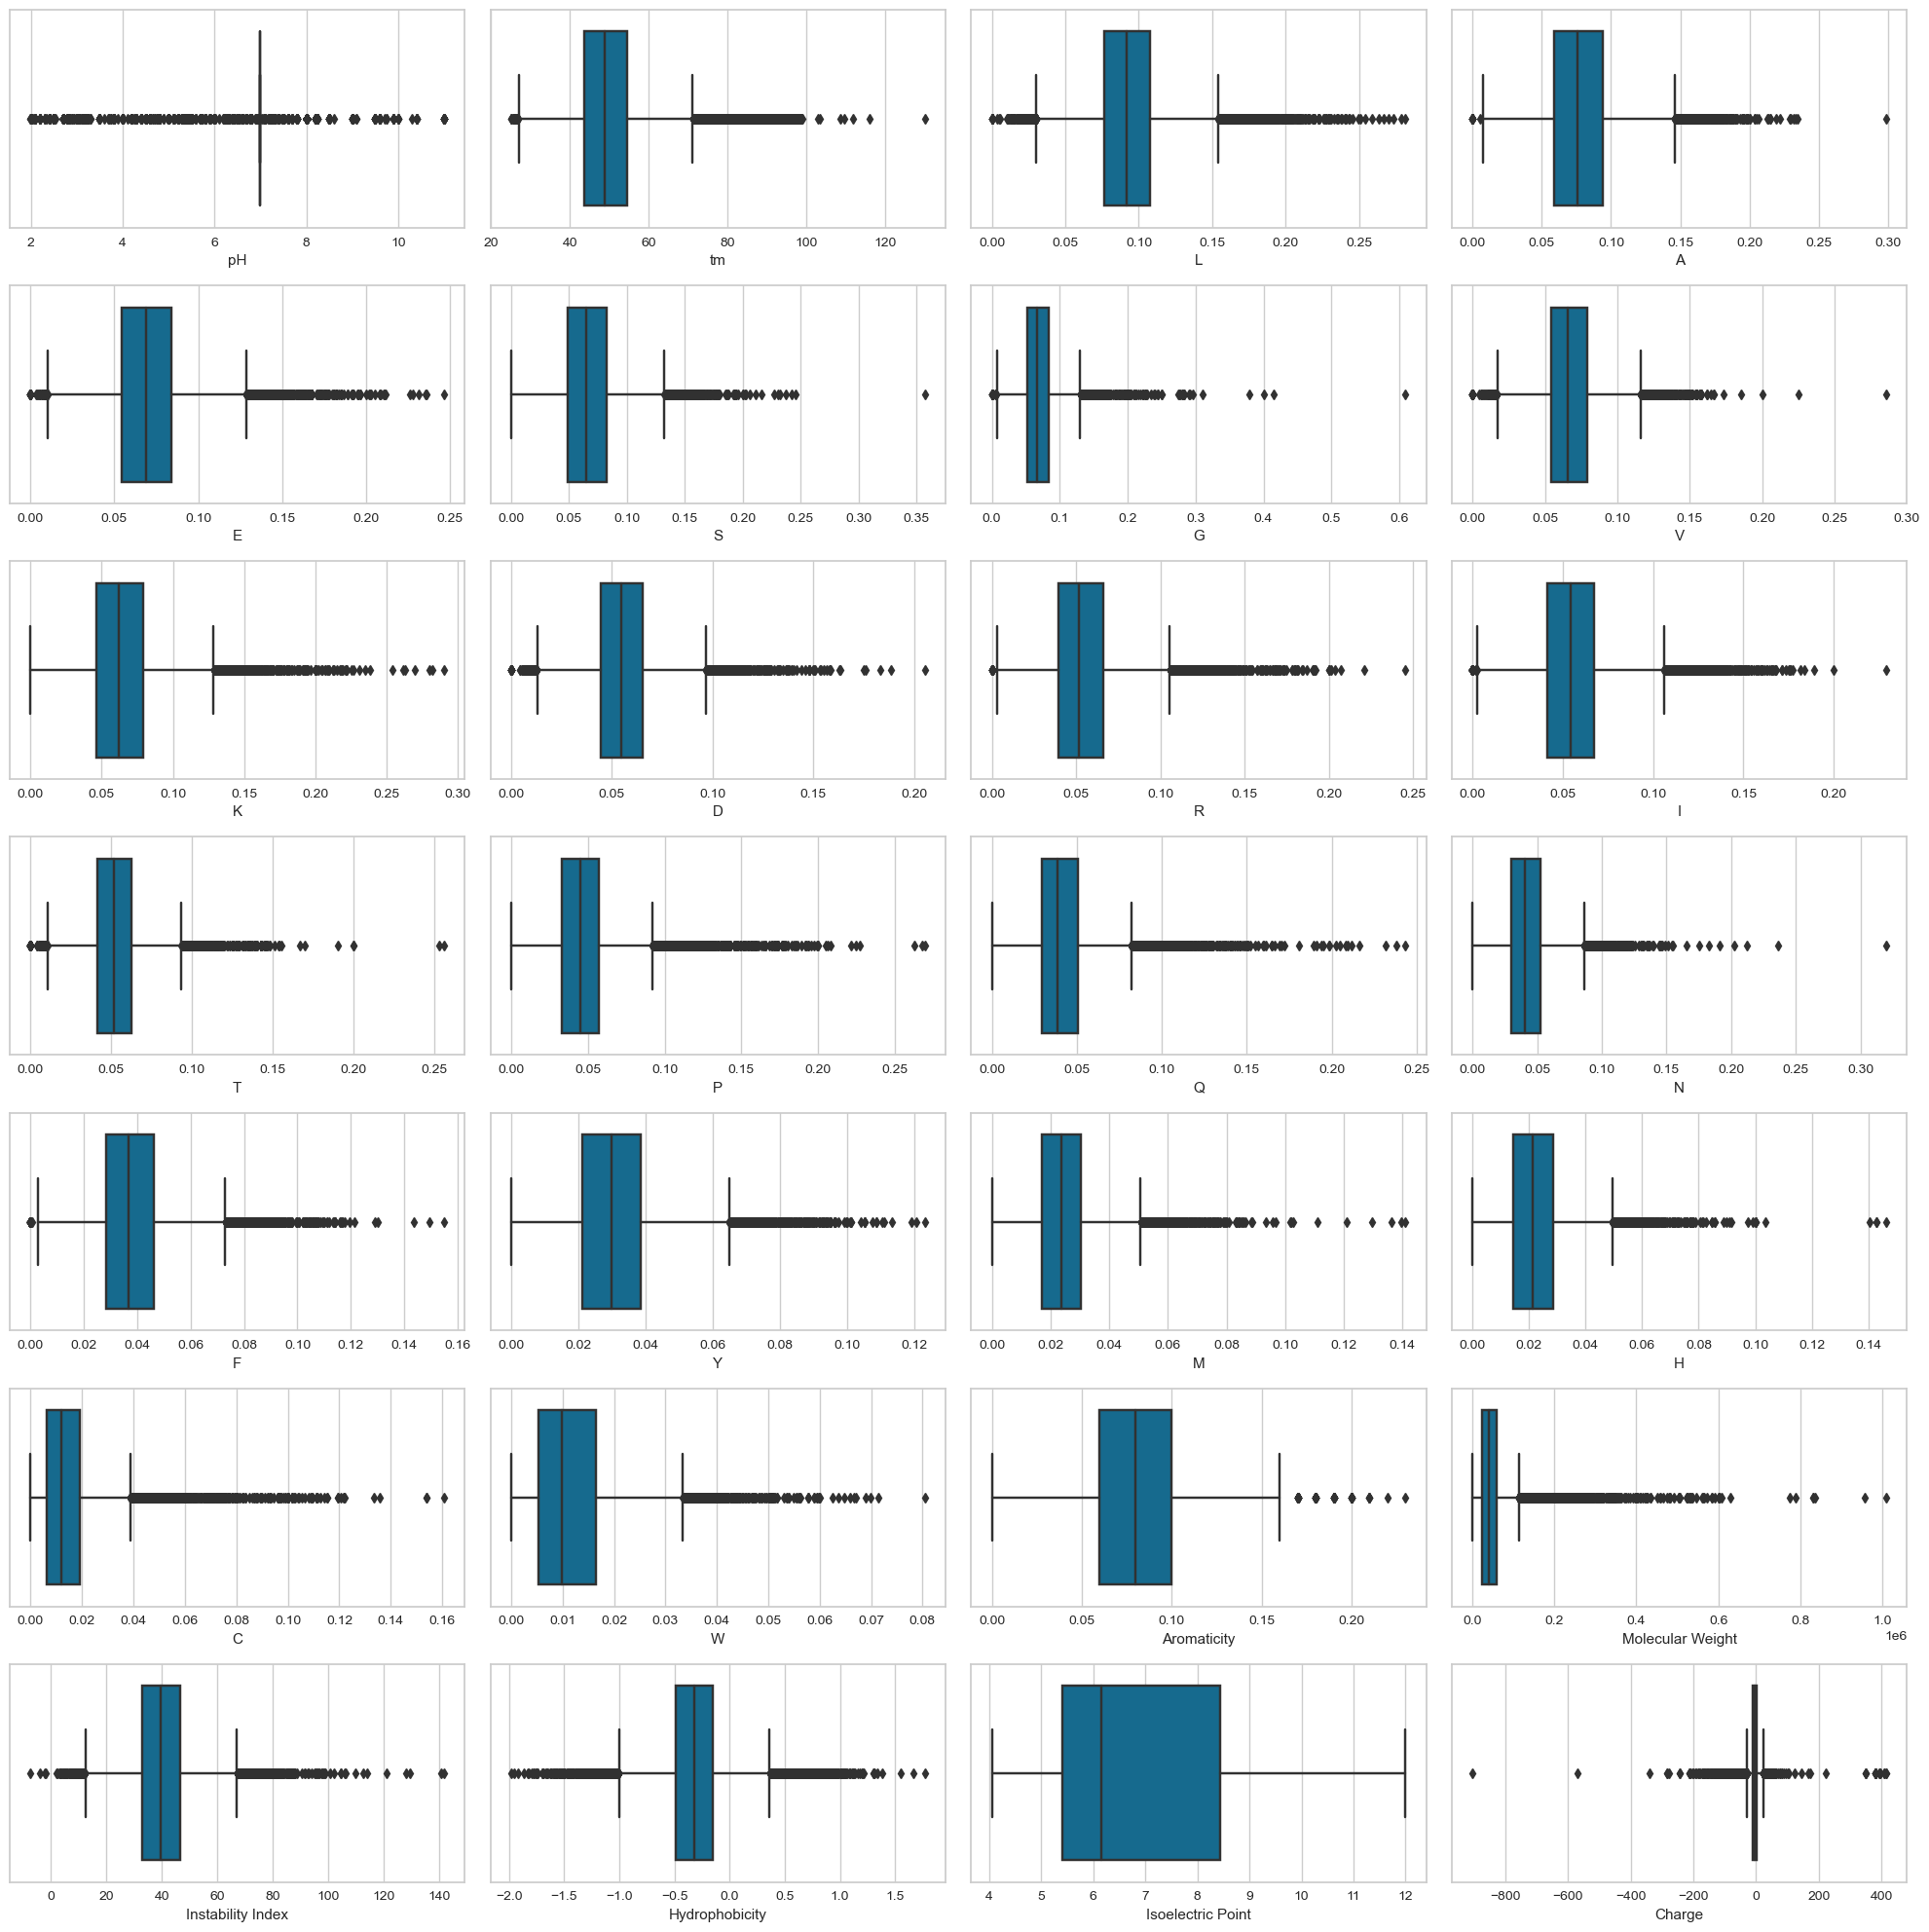

In [90]:
plt.figure(figsize=(20,20))
j = 1
for i in df3.columns:    
    plt.subplot(7,4,j)
    j +=1
    sns.boxplot(df3[i])
plt.tight_layout()    
plt.show()

# We will do Statistical Analysis to get significant features
**Since all our features are numerical and target is also numerical we  can use Correlation test to check the significance
if data is normal we can go with pearson corr coeff or  else non parametric Spearsman test**



**Normality Test**

**H0: Data is Normal  P > 0.05**

**H1: Data is not Normal P < 0.05**

In [91]:
from scipy.stats import shapiro,pearsonr,spearmanr

In [92]:
shapiro(df3['tm'])
#our target is not normal so we will go by spearmanr

ShapiroResult(statistic=0.8782355189323425, pvalue=0.0)

# In Correlation Test as P_value < 0.05 we favour alternate hypoothesis there is correlation between the two variables

In [93]:
fi = pd.DataFrame([  (i, spearmanr(df3['tm'],df3[i])[1] )    for i in df3.drop(columns='tm').columns])
fi[fi[1] < 0.05]

0              1
0                  pH   1.772459e-07
1                   L   5.149968e-50
2                   A  1.265151e-142
3                   E   4.185071e-05
4                   S  6.474163e-228
5                   G  2.108660e-168
6                   V   2.027986e-40
7                   K  1.342249e-119
8                   D   4.030932e-93
9                   R   3.206122e-83
10                  I   1.567008e-56
11                  T  5.532015e-113
12                  P   1.625328e-30
13                  Q  4.280394e-132
14                  N  2.503646e-126
15                  F   9.565031e-66
16                  Y   6.814313e-06
17                  M   1.028380e-28
18                  H   5.569012e-38
19                  C  6.402840e-123
20                  W   3.118607e-03
21        Aromaticity   9.691449e-03
22   Molecular Weight  1.038587e-181
23  Instability Index   1.136508e-40
24     Hydrophobicity  3.299977e-113
25  Isoelectric Point   2.122649e-03
26             Charge   2.538637e-17

## At 85% Confidence we can say thatt there is correlation between all the variables with our target so we can keep all our feature for modelling. But we know that correlation doesnt imply causation so just because of minor correlation we cannot say that the features are strong predictors . So we need to find it out during model building whether they help in prediction or Not

# Model Building 


## We will try with transformed data as well as Normal Data and see which one is performing better based on that we will do further model building along with that we will also try PCA and findout which one is performing better 
## Metrics as per the problem is SpearmanR coeff between predicted and actucal values
## along with that will also check R2 and RMSE

## We Will do model Selection by Auto Ml techniques

In [94]:
X = df3.drop(columns ='tm')
y = df3['tm']

In [95]:
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)

In [295]:
pt =PowerTransformer()
pt.fit(xtrain)

PowerTransformer()

In [296]:
xtrain_trans = pd.DataFrame(pt.transform(xtrain),columns=xtrain.columns)
xtest_trans = pd.DataFrame(pt.transform(xtest),columns=xtest.columns)

In [299]:
setup(data = df3,target='tm',remove_multicollinearity=True,transformation=True)

In [304]:
compare_models(fold=5)

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [305]:
setup(data = df3,target='tm',remove_multicollinearity=True,transformation=False)

In [306]:
compare_models(fold=5)

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [309]:
from sklearn.metrics import *

In [318]:
perf_score = pd.DataFrame(columns=['Model','Corr_Sp_Train','Corr_Sp_Test' ,'R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):


    rsq_train = r2_score(ytrain,pred_train)
    rsq_test  = r2_score(ytest,pred_test)

  





    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))
    corr_train = spearmanr(ytrain,pred_train)[0]
    corr_test = spearmanr(ytest,pred_test)[0]


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (corr_train,corr_test,rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance (name, model,ytrain,pred_train,ytest,pred_test  ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'Corr_Sp_Train'  : per_measures(model)[0],
                                    'Corr_Sp_Test'   : per_measures(model)[1],
                                    'R2_Train'       : per_measures(model)[2],
                                    'R2_Test'        : per_measures(model)[3],
                                    'RMSE Train'     : per_measures(model)[4],
                                    'RMSE TEST'      : per_measures(model)[5],
                                    'MAPE'           : per_measures(model)[6]
                                    },
                                   ignore_index = True)

# We are getting better performances for Xgb and Random Foorrest 

In [323]:
xgb =XGBRegressor()
xgb.fit(xtrain_trans,ytrain)
pred_train = xgb.predict(xtrain_trans)
pred_test = xgb.predict(xtest_trans)

In [324]:
update_performance('xgb_trans_base',xgb,ytrain,pred_train,ytest,pred_test)

In [325]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779       0.56077  0.829445  0.590346   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643

In [326]:
spearmanr(ytest,pred_test)

SignificanceResult(statistic=0.5607700334523678, pvalue=0.0)

In [329]:
rf =RandomForestRegressor()
rf.fit(xtrain_trans,ytrain)
pred_train = rf.predict(xtrain_trans)
pred_test = rf.predict(xtest_trans)
update_performance('rf_trans_base',rf,ytrain,pred_train,ytest,pred_test)


In [330]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288

In [331]:
xgb =XGBRegressor()
xgb.fit(xtrain,ytrain)
pred_train = xgb.predict(xtrain)
pred_test = xgb.predict(xtest)
update_performance('xgb_base',xgb,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657

In [332]:
rf =RandomForestRegressor(random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)
update_performance('rf_base',rf,ytrain,pred_train,ytest,pred_test)


In [334]:
perf_score.sort_values(by ='Corr_Sp_Test',ascending=False)

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
3         rf_base       0.962733      0.580240  0.938454  0.608170   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   

   RMSE Train  RMSE TEST       MAPE  
1    3.001659   7.578498  10.968288  
3    2.988438   7.556068  10.953103  
2    4.974822   7.728195  11.254657  
0    4.974822   7.726023  11.254643

# Since Transformed Data and Non Transformed Data are giving Similiar result we will go by non transformed Data

In [336]:
from sklearn.linear_model import  Ridge,LinearRegression

In [337]:
lr =LinearRegression()
lr.fit(xtrain,ytrain)
pred_train = lr.predict(xtrain)
pred_test = lr.predict(xtest)
update_performance('lr_base',lr,ytrain,pred_train,ytest,pred_test)


In [338]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   
3         rf_base       0.962733      0.580240  0.938454  0.608170   
4         lr_base       0.302526      0.311528  0.258274  0.259061   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321

In [339]:
rd =Ridge()
rd.fit(xtrain,ytrain)
pred_train = rd.predict(xtrain)
pred_test = rd.predict(xtest)
update_performance('rd_base',rd,ytrain,pred_train,ytest,pred_test)


In [340]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   
3         rf_base       0.962733      0.580240  0.938454  0.608170   
4         lr_base       0.302526      0.311528  0.258274  0.259061   
5         rd_base       0.299615      0.308810  0.255903  0.256383   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321  
5   10.391065  10.409309  15.727649

In [341]:
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
pred_train = knn.predict(xtrain)
pred_test = knn.predict(xtest)
update_performance('knn_base',knn,ytrain,pred_train,ytest,pred_test)



In [342]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   
3         rf_base       0.962733      0.580240  0.938454  0.608170   
4         lr_base       0.302526      0.311528  0.258274  0.259061   
5         rd_base       0.299615      0.308810  0.255903  0.256383   
6        knn_base       0.496782      0.204965  0.299209 -0.071100   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321  
5   10.391065  10.409309  15.727649  
6   10.084158  12.492869  17.136857

In [343]:
gbd  =GradientBoostingRegressor()
gbd.fit(xtrain,ytrain)
pred_train = gbd.predict(xtrain)
pred_test = gbd.predict(xtest)
update_performance('gbd_base',gbd,ytrain,pred_train,ytest,pred_test)



In [344]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0  xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1   rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2        xgb_base       0.812779      0.560781  0.829445  0.590115   
3         rf_base       0.962733      0.580240  0.938454  0.608170   
4         lr_base       0.302526      0.311528  0.258274  0.259061   
5         rd_base       0.299615      0.308810  0.255903  0.256383   
6        knn_base       0.496782      0.204965  0.299209 -0.071100   
7        gbd_base       0.536858      0.497618  0.559281  0.531733   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321  
5   10.391065  10.409309  15.727649  
6   10.084158  12.492869  17.136857  
7    7.996984   8.260267  12.214868

# We will tune random forrest ,Xgb,grad_boost and try voting stacking , stacking 

In [346]:
from sklearn.ensemble import *

In [348]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('linear_regression', LinearRegression()),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

meta_learner = RandomForestRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=3  # Cross-validation for stacking
)

stacking_regressor.fit(xtrain, ytrain)
pred_train = stacking_regressor.predict(xtrain)
pred_test = stacking_regressor.predict(xtest)
update_performance('stacking_x,rf,lr,gbd,rf',stacking_regressor,ytrain,pred_train,ytest,pred_test)


In [349]:
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0           xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1            rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                 xgb_base       0.812779      0.560781  0.829445  0.590115   
3                  rf_base       0.962733      0.580240  0.938454  0.608170   
4                  lr_base       0.302526      0.311528  0.258274  0.259061   
5                  rd_base       0.299615      0.308810  0.255903  0.256383   
6                 knn_base       0.496782      0.204965  0.299209 -0.071100   
7                 gbd_base       0.536858      0.497618  0.559281  0.531733   
8  stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321  
5   10.391065  10.409309  15.727649  
6   10.084158  12.492869  17.136857  
7    7.996984   8.260267  12.214868  
8    4.420456   7.698841  11.176768

In [350]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('linear_regression', LinearRegression()),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

meta_learner = XGBRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=3  # Cross-validation for stacking
)

stacking_regressor.fit(xtrain, ytrain)
pred_train = stacking_regressor.predict(xtrain)
pred_test = stacking_regressor.predict(xtest)
update_performance('stacking_x,rf,lr,gbd,x',stacking_regressor,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0           xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1            rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                 xgb_base       0.812779      0.560781  0.829445  0.590115   
3                  rf_base       0.962733      0.580240  0.938454  0.608170   
4                  lr_base       0.302526      0.311528  0.258274  0.259061   
5                  rd_base       0.299615      0.308810  0.255903  0.256383   
6                 knn_base       0.496782      0.204965  0.299209 -0.071100   
7                 gbd_base       0.536858      0.497618  0.559281  0.531733   
8  stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
9   stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   

   RMSE Train  RMSE TEST       MAPE  
0    4.974822   7.726023  11.254643  
1    3.001659   7.578498  10.968288  
2    4.974822   7.728195  11.254657  
3    2.988438   7.556068  10.953103  
4   10.374499  10.390550  15.783321  
5   10.391065  10.409309  15.727649  
6   10.084158  12.492869  17.136857  
7    7.996984   8.260267  12.214868  
8    4.420456   7.698841  11.176768  
9    4.356204   7.660347  11.092984

In [351]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
 
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

meta_learner = XGBRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=3  # Cross-validation for stacking
)

stacking_regressor.fit(xtrain, ytrain)
pred_train = stacking_regressor.predict(xtrain)
pred_test = stacking_regressor.predict(xtest)
update_performance('stacking_x,rf,lr,gbd,x',stacking_regressor,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   

    RMSE Train  RMSE TEST       MAPE  
0     4.974822   7.726023  11.254643  
1     3.001659   7.578498  10.968288  
2     4.974822   7.728195  11.254657  
3     2.988438   7.556068  10.953103  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857  
7     7.996984   8.260267  12.214868  
8     4.420456   7.698841  11.176768  
9     4.356204   7.660347  11.092984  
10    4.247981   7.728108  11.080128

In [352]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

meta_learner = RandomForestRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=3  # Cross-validation for stacking
)

stacking_regressor.fit(xtrain, ytrain)
pred_train = stacking_regressor.predict(xtrain)
pred_test = stacking_regressor.predict(xtest)
update_performance('stacking_x,rf,lr,gbd,rf',stacking_regressor,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   

    RMSE Train  RMSE TEST       MAPE  
0     4.974822   7.726023  11.254643  
1     3.001659   7.578498  10.968288  
2     4.974822   7.728195  11.254657  
3     2.988438   7.556068  10.953103  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857  
7     7.996984   8.260267  12.214868  
8     4.420456   7.698841  11.176768  
9     4.356204   7.660347  11.092984  
10    4.247981   7.728108  11.080128  
11    4.527330   7.815471  11.386010

In [353]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('linear_regression', LinearRegression()),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

# Create the VotingRegressor
voting_regressor = VotingRegressor(estimators=base_models)
voting_regressor.fit(xtrain,ytrain)
pred_train = voting_regressor.predict(xtrain)
pred_test = voting_regressor.predict(xtest)
update_performance('voting,rf,lr,gbd,rf',voting_regressor,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   
12      voting,rf,lr,gbd,rf       0.796096      0.552560  0.749943  0.577371   

    RMSE Train  RMSE TEST       MAPE  
0     4.974822   7.726023  11.254643  
1     3.001659   7.578498  10.968288  
2     4.974822   7.728195  11.254657  
3     2.988438   7.556068  10.953103  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857  
7     7.996984   8.260267  12.214868  
8     4.420456   7.698841  11.176768  
9     4.356204   7.660347  11.092984  
10    4.247981   7.728108  11.080128  
11    4.527330   7.815471  11.386010  
12    6.023719   7.847418  11.775871

In [354]:
base_models = [
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

# Create the VotingRegressor
voting_regressor = VotingRegressor(estimators=base_models)
voting_regressor.fit(xtrain,ytrain)
pred_train = voting_regressor.predict(xtrain)
pred_test = voting_regressor.predict(xtest)
update_performance('voting,rf,lr,gbd,rf',voting_regressor,ytrain,pred_train,ytest,pred_test)
perf_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   
12      voting,rf,lr,gbd,rf       0.796096      0.552560  0.749943  0.577371   
13      voting,rf,lr,gbd,rf       0.869132      0.579236  0.825082  0.608320   

    RMSE Train  RMSE TEST       MAPE  
0     4.974822   7.726023  11.254643  
1     3.001659   7.578498  10.968288  
2     4.974822   7.728195  11.254657  
3     2.988438   7.556068  10.953103  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857  
7     7.996984   8.260267  12.214868  
8     4.420456   7.698841  11.176768  
9     4.356204   7.660347  11.092984  
10    4.247981   7.728108  11.080128  
11    4.527330   7.815471  11.386010  
12    6.023719   7.847418  11.775871  
13    5.038047   7.554626  11.110702

In [356]:
perf_score.sort_values(by =['Corr_Sp_Test','R2_Test','RMSE TEST'],ascending=[False,False,True])

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
13      voting,rf,lr,gbd,rf       0.869132      0.579236  0.825082  0.608320   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
12      voting,rf,lr,gbd,rf       0.796096      0.552560  0.749943  0.577371   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   

    RMSE Train  RMSE TEST       MAPE  
1     3.001659   7.578498  10.968288  
3     2.988438   7.556068  10.953103  
13    5.038047   7.554626  11.110702  
10    4.247981   7.728108  11.080128  
9     4.356204   7.660347  11.092984  
2     4.974822   7.728195  11.254657  
0     4.974822   7.726023  11.254643  
8     4.420456   7.698841  11.176768  
12    6.023719   7.847418  11.775871  
11    4.527330   7.815471  11.386010  
7     7.996984   8.260267  12.214868  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857

In [357]:
perf_score.sort_values(by ='R2_Test',ascending=False)

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
13      voting,rf,lr,gbd,rf       0.869132      0.579236  0.825082  0.608320   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   
12      voting,rf,lr,gbd,rf       0.796096      0.552560  0.749943  0.577371   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   

    RMSE Train  RMSE TEST       MAPE  
13    5.038047   7.554626  11.110702  
3     2.988438   7.556068  10.953103  
1     3.001659   7.578498  10.968288  
9     4.356204   7.660347  11.092984  
8     4.420456   7.698841  11.176768  
0     4.974822   7.726023  11.254643  
10    4.247981   7.728108  11.080128  
2     4.974822   7.728195  11.254657  
11    4.527330   7.815471  11.386010  
12    6.023719   7.847418  11.775871  
7     7.996984   8.260267  12.214868  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857

In [362]:
perf_score.sort_values(by ='RMSE TEST')

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  \
13      voting,rf,lr,gbd,rf       0.869132      0.579236  0.825082  0.608320   
3                   rf_base       0.962733      0.580240  0.938454  0.608170   
1             rf_trans_base       0.962179      0.581518  0.937909  0.605840   
9    stacking_x,rf,lr,gbd,x       0.884279      0.569043  0.869225  0.597281   
8   stacking_x,rf,lr,gbd,rf       0.874798      0.559220  0.865339  0.593223   
0            xgb_trans_base       0.812779      0.560770  0.829445  0.590346   
10   stacking_x,rf,lr,gbd,x       0.904659      0.569933  0.875642  0.590124   
2                  xgb_base       0.812779      0.560781  0.829445  0.590115   
11  stacking_x,rf,lr,gbd,rf       0.861813      0.544429  0.858748  0.580805   
12      voting,rf,lr,gbd,rf       0.796096      0.552560  0.749943  0.577371   
7                  gbd_base       0.536858      0.497618  0.559281  0.531733   
4                   lr_base       0.302526      0.311528  0.258274  0.259061   
5                   rd_base       0.299615      0.308810  0.255903  0.256383   
6                  knn_base       0.496782      0.204965  0.299209 -0.071100   

    RMSE Train  RMSE TEST       MAPE  
13    5.038047   7.554626  11.110702  
3     2.988438   7.556068  10.953103  
1     3.001659   7.578498  10.968288  
9     4.356204   7.660347  11.092984  
8     4.420456   7.698841  11.176768  
0     4.974822   7.726023  11.254643  
10    4.247981   7.728108  11.080128  
2     4.974822   7.728195  11.254657  
11    4.527330   7.815471  11.386010  
12    6.023719   7.847418  11.775871  
7     7.996984   8.260267  12.214868  
4    10.374499  10.390550  15.783321  
5    10.391065  10.409309  15.727649  
6    10.084158  12.492869  17.136857

# We can see that Random Forrest and Voting Classifer along with 4 models are giving the same result as of a Random Forrest  so we will go forward with Random Forrest and do regularization

In [363]:
rf =RandomForestRegressor(random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)


In [ ]:
update_performance('rf_base',rf,ytrain,pred_train,ytest,pred_test)


KeyboardInterrupt: 

In [103]:
reg_score = pd.DataFrame(columns=['Model','Corr_Sp_Train','Corr_Sp_Test' ,'R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):


    rsq_train = r2_score(ytrain,pred_train)
    rsq_test  = r2_score(ytest,pred_test)

  





    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))
    corr_train = spearmanr(ytrain,pred_train)[0]
    corr_test = spearmanr(ytest,pred_test)[0]


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (corr_train,corr_test,rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance1(name, model,ytrain,pred_train,ytest,pred_test  ):


    # assign 'comp_perf' as global variable
    global reg_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    reg_score = reg_score.append({'Model'          : name,
                                    'Corr_Sp_Train'  : per_measures(model)[0],
                                    'Corr_Sp_Test'   : per_measures(model)[1],
                                    'R2_Train'       : per_measures(model)[2],
                                    'R2_Test'        : per_measures(model)[3],
                                    'RMSE Train'     : per_measures(model)[4],
                                    'RMSE TEST'      : per_measures(model)[5],
                                    'MAPE'           : per_measures(model)[6]
                                    },
                                   ignore_index = True)









# Since we have large no of features and less data we will also try pca transformation 

In [105]:
xtrain

pH         L         A         E         S         G         V  \
5577   7.0  0.093284  0.080224  0.076493  0.069030  0.063433  0.063433   
16028  7.7  0.119718  0.035211  0.049296  0.063380  0.049296  0.056338   
5360   7.0  0.097561  0.097561  0.060976  0.048780  0.085366  0.036585   
4636   7.0  0.075658  0.062500  0.095395  0.069079  0.065789  0.072368   
430    7.0  0.032258  0.109677  0.045161  0.135484  0.067742  0.083871   
...    ...       ...       ...       ...       ...       ...       ...   
7291   7.0  0.094406  0.080420  0.041958  0.143357  0.069930  0.090909   
28075  7.0  0.088517  0.078947  0.102871  0.081340  0.059809  0.064593   
17773  7.0  0.118088  0.102156  0.102156  0.080600  0.045923  0.057170   
7293   7.0  0.093156  0.110266  0.039924  0.098859  0.068441  0.076046   
17718  7.0  0.098639  0.085034  0.047619  0.064626  0.037415  0.051020   

              K         D         R  ...         M         H         C  \
5577   0.072761  0.046642  0.048507  ...  0.007463  0.026119  0.024254   
16028  0.084507  0.084507  0.007042  ...  0.021127  0.028169  0.056338   
5360   0.060976  0.073171  0.060976  ...  0.024390  0.024390  0.036585   
4636   0.059211  0.062500  0.049342  ...  0.026316  0.023026  0.032895   
430    0.019355  0.038710  0.006452  ...  0.006452  0.019355  0.012903   
...         ...       ...       ...  ...       ...       ...       ...   
7291   0.048951  0.045455  0.048951  ...  0.010490  0.006993  0.013986   
28075  0.066986  0.055024  0.057416  ...  0.031100  0.011962  0.002392   
17773  0.063730  0.044049  0.067479  ...  0.021556  0.029053  0.010309   
7293   0.057034  0.047529  0.036122  ...  0.020913  0.020913  0.007605   
17718  0.054422  0.078231  0.051020  ...  0.020408  0.006803  0.017007   

              W  Aromaticity  Molecular Weight  Instability Index  \
5577   0.007463         0.10          60077.63              44.93   
16028  0.028169         0.10          16245.46              27.58   
5360   0.000000         0.06           9009.23              57.51   
4636   0.003289         0.06          33848.36              51.34   
430    0.012903         0.07          31916.07              31.69   
...         ...          ...               ...                ...   
7291   0.010490         0.07          30629.41              40.56   
28075  0.011962         0.07          46878.43              43.07   
17773  0.004686         0.04         119261.85              53.06   
7293   0.000000         0.07          56364.30              41.45   
17718  0.037415         0.13          33969.83              26.35   

       Hydrophobicity  Isoelectric Point  Charge  
5577            -0.41               6.92   -0.32  
16028           -0.17               5.07   -7.21  
5360            -0.27               6.05   -1.34  
4636            -0.14               5.00  -14.90  
430             -0.22               4.34  -17.68  
...               ...                ...     ...  
7291             0.04               8.63    2.66  
28075           -0.45               5.11  -14.01  
17773           -0.54               6.10  -13.63  
7293            -0.15               8.47    3.47  
17718           -0.47               5.12   -6.34  

[21673 rows x 27 columns]

In [106]:
ss =StandardScaler()

In [107]:
ss.fit(xtrain)

StandardScaler()

In [108]:
xtrain_sc = pd.DataFrame(ss.transform(xtrain),columns=xtrain.columns)
xtest_sc = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

**Scaling Data Before PCA**

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca =PCA()

In [111]:
pca.fit(xtrain_sc)


PCA()

In [112]:
xtrain_pca = pd.DataFrame(pca.transform(xtrain_sc),columns = [ 'pca_'+str(i) for i  in range(1,(xtrain.shape[1]+1))])
xtest_pca = pd.DataFrame(pca.transform(xtest_sc),columns = [ 'pca_'+str(i) for i  in range(1,(xtrain.shape[1]+1))])

In [113]:
xtrain_pca

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0      0.611514 -0.191179  0.312309  1.491284  0.505714 -0.066995  0.550377   
1     -2.192435 -2.495991  0.923455  0.414592 -0.853017  0.747623 -1.930100   
2      0.885981  0.207214 -0.153335 -0.223329  0.028507  0.245123 -0.409939   
3      0.511976 -0.636131  1.153282 -1.350184 -0.241811 -0.835724 -0.344743   
4     -0.694559 -0.313091  0.914046  0.374624 -7.100805  2.028400  1.169433   
...         ...       ...       ...       ...       ...       ...       ...   
21668 -0.754378  0.911685 -0.486082  0.225163 -2.350993 -1.522979  0.069646   
21669  0.794894 -0.607558  0.401156 -1.466565 -0.031170  0.274668 -0.154719   
21670  3.856836  0.602499  0.273667 -0.595256  0.083435 -0.120681 -1.318828   
21671  0.230851  0.880823 -0.330697  0.179854 -1.680617 -1.479911  0.228682   
21672 -1.937096 -1.779673  0.225575  1.417794  0.274926  1.947249 -1.578238   

          pca_8     pca_9    pca_10  ...    pca_18    pca_19    pca_20  \
0     -1.182896  0.651392 -0.074229  ...  0.727882  0.384558  0.486222   
1      0.548090  2.697729 -0.781840  ...  0.205209 -1.806185 -0.859147   
2      1.280408 -0.085346 -1.106570  ...  0.507811 -0.965870  0.939644   
3      1.290065  0.197474 -1.146752  ... -0.380125 -0.072270  0.747665   
4     -2.794884  0.835336 -0.528636  ... -3.111992 -0.212595  0.059421   
...         ...       ...       ...  ...       ...       ...       ...   
21668 -1.307271 -1.248072 -0.891527  ... -1.497572  0.220852  0.230353   
21669 -0.213830 -0.645418  0.393911  ... -1.417750 -0.291121  0.331842   
21670 -0.322799  0.627284  0.832140  ... -0.421196  0.348539  0.685441   
21671 -0.452743 -0.206109  0.948312  ...  0.526237  1.457907 -0.273219   
21672 -0.540100 -0.289914  1.697865  ...  0.339190 -0.318380 -1.149082   

         pca_21    pca_22    pca_23    pca_24    pca_25    pca_26  \
0     -0.457862  0.181137 -0.156669  0.023454 -0.098949 -0.001117   
1      0.176609 -0.663253  0.274955  0.035421 -0.048561 -0.002521   
2     -0.320043  0.294330  1.009619  0.192128  0.022002  0.001967   
3     -0.447809  0.054142  0.426281 -0.071367  0.069430 -0.001418   
4     -0.872705 -0.515934  0.184691 -0.011935 -0.078839 -0.001060   
...         ...       ...       ...       ...       ...       ...   
21668 -0.264760  0.321840 -0.004361 -0.396285  0.118742  0.001132   
21669  0.268977 -0.338461 -0.000027  0.169745 -0.015253 -0.009717   
21670 -0.170266 -0.175319 -0.088397  0.143321  0.026282 -0.007503   
21671 -0.586706  0.369586  0.173835 -0.406118 -0.092691  0.008544   
21672 -1.216664 -0.634231 -0.649111  0.344719 -0.099725  0.007357   

             pca_27  
0     -1.616898e-15  
1      2.384213e-15  
2     -1.822026e-15  
3     -7.539284e-16  
4      9.474320e-15  
...             ...  
21668 -4.297859e-15  
21669 -7.567586e-16  
21670  6.361404e-16  
21671 -3.488856e-15  
21672 -2.536833e-15  

[21673 rows x 27 columns]

In [114]:
pca.explained_variance_

array([3.25714491e+00, 2.99636084e+00, 2.44835103e+00, 2.24087358e+00,
       1.81014604e+00, 1.44824088e+00, 1.33193284e+00, 1.07385415e+00,
       1.03878975e+00, 9.85508253e-01, 8.95853263e-01, 8.54756871e-01,
       8.30738066e-01, 7.75812782e-01, 7.14170043e-01, 6.87020198e-01,
       6.47246970e-01, 6.16177712e-01, 5.73272772e-01, 5.51971490e-01,
       5.44575587e-01, 3.84105597e-01, 2.00011789e-01, 8.69624203e-02,
       7.32101775e-03, 4.70120860e-05, 7.51647851e-30])

In [115]:
a = np.cumsum(pca.explained_variance_ratio_)
a


array([0.12062943, 0.23160064, 0.32227612, 0.40526761, 0.47230696,
       0.52594304, 0.57527161, 0.61504215, 0.65351407, 0.69001269,
       0.72319091, 0.75484711, 0.78561377, 0.81434625, 0.84079577,
       0.86623979, 0.89021079, 0.91303114, 0.93426248, 0.95470493,
       0.97487346, 0.98909894, 0.99650644, 0.99972712, 0.99999826,
       1.        , 1.        ])

In [116]:
len(a[a <=.90])



17

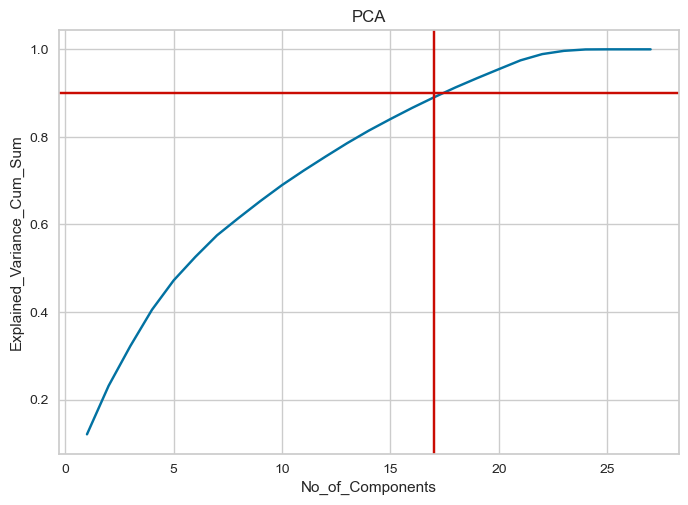

In [117]:
plt.plot((range(1,28)),a)
plt.xlabel('No_of_Components')
plt.ylabel('Explained_Variance_Cum_Sum')
plt.title('PCA')
plt.axvline(17,color ='r')
plt.axhline(.90,color = 'r')
plt.show()

**Using just 17 features we can account for the 90% variance so we will go by selecting just 17 features**

In [118]:
pca =PCA(n_components=17)
pca.fit(xtrain_sc)
xtrain_pca = pd.DataFrame(pca.transform(xtrain_sc),columns = [ 'pca_'+str(i) for i  in range(1,18)])
xtest_pca = pd.DataFrame(pca.transform(xtest_sc),columns = [ 'pca_'+str(i) for i  in range(1,18)])


In [119]:
xtrain_pca


pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0      0.611514 -0.191179  0.312309  1.491284  0.505714 -0.066995  0.550377   
1     -2.192435 -2.495991  0.923455  0.414592 -0.853017  0.747623 -1.930100   
2      0.885981  0.207214 -0.153335 -0.223329  0.028507  0.245123 -0.409939   
3      0.511976 -0.636131  1.153282 -1.350184 -0.241811 -0.835724 -0.344743   
4     -0.694559 -0.313091  0.914046  0.374624 -7.100805  2.028400  1.169433   
...         ...       ...       ...       ...       ...       ...       ...   
21668 -0.754378  0.911685 -0.486082  0.225163 -2.350993 -1.522979  0.069646   
21669  0.794894 -0.607558  0.401156 -1.466565 -0.031170  0.274668 -0.154719   
21670  3.856836  0.602499  0.273667 -0.595256  0.083435 -0.120681 -1.318828   
21671  0.230851  0.880823 -0.330697  0.179854 -1.680617 -1.479911  0.228682   
21672 -1.937096 -1.779673  0.225575  1.417794  0.274926  1.947249 -1.578238   

          pca_8     pca_9    pca_10    pca_11    pca_12    pca_13    pca_14  \
0     -1.182896  0.651392 -0.074229 -0.736977 -0.383148 -0.541272 -0.141275   
1      0.548090  2.697729 -0.781840 -1.574931 -0.829034 -1.436880 -0.170421   
2      1.280408 -0.085346 -1.106570  1.211450 -1.217238 -1.344845 -1.336038   
3      1.290065  0.197474 -1.146752 -0.932920 -0.516934 -0.573974  0.460301   
4     -2.794884  0.835336 -0.528636  2.897509 -2.176995  3.398519  1.329458   
...         ...       ...       ...       ...       ...       ...       ...   
21668 -1.307271 -1.248072 -0.891527 -1.273264 -0.232378 -1.088996  0.633304   
21669 -0.213830 -0.645418  0.393911  0.340660 -0.655344  1.072541  0.255172   
21670 -0.322799  0.627284  0.832140  0.029066  0.408831  0.026485 -0.115255   
21671 -0.452743 -0.206109  0.948312 -0.584486 -0.009624 -1.099916 -0.272821   
21672 -0.540100 -0.289914  1.697865 -1.119610 -0.847776 -0.252159  0.499614   

         pca_15    pca_16    pca_17  
0      0.893298  0.405544  0.208923  
1     -0.189556 -0.294991 -0.197652  
2      0.434228  1.426807 -0.258986  
3     -0.083224  1.619430  0.866639  
4     -1.483664  0.204679 -0.159953  
...         ...       ...       ...  
21668 -0.548168 -0.935431  0.029704  
21669 -0.504134 -0.202662  0.001867  
21670  0.620713 -0.318167 -0.224985  
21671  0.360162 -0.590649 -0.380973  
21672 -1.051002 -1.200626 -0.449888  

[21673 rows x 17 columns]

In [104]:
setup(data=df3,target='tm',pca=True,pca_components=17)

In [105]:
c = ['lr','dt','xgboost','gbr','rf','lasso','knn']

In [106]:
compare_models(include=c,fold=3)

Processing:   0%|          | 0/33 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=6601)

In [120]:
rf = RandomForestRegressor(random_state=10)
rf.fit(xtrain_pca,ytrain)



RandomForestRegressor(random_state=10)

In [121]:
pred_train = rf.predict(xtrain_pca)
pred_test = rf.predict(xtest_pca)
update_performance1('rf_pca_17',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   

   RMSE TEST       MAPE  
0   7.672451  11.236089

In [122]:
rf =RandomForestRegressor(random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_base',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716

NameError: name 'reg_score' is not defined

**Even after doing pca aand feature reduction the Random Forrest Regressor is giving the same result as that of
the  normal data . So , We can work on the normal data itself**

## Regularization

**Now we have found out that Random Forrest Regressor is performing comparatively better than other models along 
with the preprocessed data without any transformations**


**As we can see that our model has high Variance and is in Overfit condition**

**To achieve optimum bias-variance tradeoff we will do hyperparameter tuning we will introduce some bias to the model to make the model more generalizable and make it come out off overfit condition**

In [127]:
param_grid = {
    'n_estimators': [50,100, 200, ],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2,3, 5],
    'min_samples_leaf': [1, 2,3, ],
    'max_features': [ 'sqrt', 'log2',  0.5]

}

rf_regressor = RandomForestRegressor(random_state=10)


grid_search = GridSearchCV(
    rf_regressor, param_grid, cv=2
    ,scoring='neg_root_mean_squared_error'
)

grid_search.fit(xtrain, ytrain)


print(grid_search.best_params_)
#run time 4hrs

{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
4*4*3*3*3

In [128]:
rf =RandomForestRegressor(**grid_search.best_params_,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned1',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459

In [129]:
param_grid = {
    'n_estimators': [ 300,500,1000],  
    'max_depth': [ 30,50,100],  
    'min_samples_split': [5,7, 10,12],
    'min_samples_leaf': [3, 5,],
    'max_features': [ 'sqrt', 'log2', 0.2, 0.5]

}

rf_regressor = RandomForestRegressor(random_state=10)


grid_search = GridSearchCV(
    rf_regressor, param_grid, cv=2,
    ,scoring='neg_root_mean_squared_error'
)

grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)

{'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000}


In [130]:
rf =RandomForestRegressor(**grid_search.best_params_,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned2',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430

**Now we will try to do hyperparameter to reduce overfitt condition , Our goal is to make the train and test results similiar as possible**

In [144]:
param_grid = {
    
    'n_estimators': [ 1000],  
    'max_depth': [ 30],  
    'min_samples_split': [5],
    'min_samples_leaf': [3],
    'max_features': [ 'sqrt', 'log2']

}

rf_regressor = RandomForestRegressor(random_state=10)


grid_search = GridSearchCV(
    rf_regressor, param_grid
    ,scoring='neg_root_mean_squared_error'
,verbose=1,cv=2)

grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000}


In [146]:
rf = RandomForestRegressor(**grid_search.best_params_,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned3',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692

In [149]:
param_grid = {
    
    'n_estimators': 750,  
    'max_depth': 30,  
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned4',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5  rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692  
5   7.481785  10.899874

In [150]:
param_grid = {
    
    'n_estimators': 500,  
    'max_depth': 30,  
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned5',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5  rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6  rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692  
5   7.481785  10.899874  
6   7.485625  10.904955

In [151]:
param_grid = {
    
    'n_estimators': 900,  
    'max_depth': 30,  
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned6',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5  rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6  rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7  rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692  
5   7.481785  10.899874  
6   7.485625  10.904955  
7   7.480600  10.895769

In [153]:
param_grid = {
    
    'n_estimators': 1100,  
    'max_depth': 30,  
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned7',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5  rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6  rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7  rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8  rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692  
5   7.481785  10.899874  
6   7.485625  10.904955  
7   7.480600  10.895769  
8   7.479622  10.895338

In [155]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 25,  
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned8',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0  rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1    rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2  rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3  rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4  rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5  rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6  rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7  rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8  rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9  rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   

   RMSE TEST       MAPE  
0   7.672451  11.236089  
1   7.564868  10.939716  
2   7.483969  10.899459  
3   7.478795  10.892430  
4   7.539672  11.050692  
5   7.481785  10.899874  
6   7.485625  10.904955  
7   7.480600  10.895769  
8   7.479622  10.895338  
9   7.480745  10.917655

In [156]:
rf = RandomForestRegressor(n_estimators=1024, max_depth=256, min_samples_split=20, min_samples_leaf=1, 
                               max_features='sqrt', bootstrap=False, random_state=10)

rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned9',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0   rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1     rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2   rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3   rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4   rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5   rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6   rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7   rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8   rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9   rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10  rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312

In [157]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned10',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312  
11   7.529030  10.986093

In [159]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 15,
    'min_samples_leaf': 5,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned11',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   
12  rf_tuned11       0.871373      0.583544  0.807879  0.607397    5.279984   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312  
11   7.529030  10.986093  
12   7.563516  11.029326

In [160]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 15,
    'min_samples_leaf': 7,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned12',rf,ytrain,pred_train,ytest,pred_test)
reg_score


Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   
12  rf_tuned11       0.871373      0.583544  0.807879  0.607397    5.279984   
13  rf_tuned12       0.856399      0.581720  0.791754  0.604760    5.497100   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312  
11   7.529030  10.986093  
12   7.563516  11.029326  
13   7.588878  11.073612

In [161]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 20,
    'min_samples_leaf': 5,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned12',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   
12  rf_tuned11       0.871373      0.583544  0.807879  0.607397    5.279984   
13  rf_tuned12       0.856399      0.581720  0.791754  0.604760    5.497100   
14  rf_tuned12       0.848029      0.580736  0.785782  0.603392    5.575363   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312  
11   7.529030  10.986093  
12   7.563516  11.029326  
13   7.588878  11.073612  
14   7.602000  11.101325

In [164]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 22,
    'min_samples_leaf': 7,
    'max_features': 0.5

}



rf = RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

update_performance1('rf_tuned12',rf,ytrain,pred_train,ytest,pred_test)
reg_score

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   
12  rf_tuned11       0.871373      0.583544  0.807879  0.607397    5.279984   
13  rf_tuned12       0.856399      0.581720  0.791754  0.604760    5.497100   
14  rf_tuned12       0.848029      0.580736  0.785782  0.603392    5.575363   
15  rf_tuned12       0.827736      0.579090  0.764675  0.599819    5.843587   

    RMSE TEST       MAPE  
0    7.672451  11.236089  
1    7.564868  10.939716  
2    7.483969  10.899459  
3    7.478795  10.892430  
4    7.539672  11.050692  
5    7.481785  10.899874  
6    7.485625  10.904955  
7    7.480600  10.895769  
8    7.479622  10.895338  
9    7.480745  10.917655  
10   7.508265  11.028312  
11   7.529030  10.986093  
12   7.563516  11.029326  
13   7.588878  11.073612  
14   7.602000  11.101325  
15   7.636167  11.144199

**We have tried HyperParameter tuning many times to get the best combination to make our model more reliable our goal is to 
make our model more reliable , so as close  we are getting the test and train results better our model will be that is our 
goal is reduce high variancs and make model relaible introducing too much bias also can make the model underfit
the best test performance that we got here the spearmanr coeff of around 0.60 for test. from intitial train being .97 
and test beign 0.50 we did hyperparmeter tuning to make it around 0.80 for train and 0.60 for test and we will select the 
parameters corresponding to that move forward with that.**

In [166]:
reg_score['train_test_diff'] = reg_score['Corr_Sp_Train'] -reg_score['Corr_Sp_Test']

In [168]:
reg_score.sort_values(by ='train_test_diff')

Model  Corr_Sp_Train  Corr_Sp_Test  R2_Train   R2_Test  RMSE Train  \
15  rf_tuned12       0.827736      0.579090  0.764675  0.599819    5.843587   
14  rf_tuned12       0.848029      0.580736  0.785782  0.603392    5.575363   
13  rf_tuned12       0.856399      0.581720  0.791754  0.604760    5.497100   
12  rf_tuned11       0.871373      0.583544  0.807879  0.607397    5.279984   
11  rf_tuned10       0.895955      0.586145  0.833974  0.610969    4.908324   
9    rf_tuned8       0.918068      0.587201  0.870644  0.615943    4.332495   
4    rf_tuned3       0.920599      0.585682  0.861056  0.609869    4.490202   
3    rf_tuned2       0.934309      0.590133  0.884062  0.616143    4.101648   
7    rf_tuned6       0.934201      0.589995  0.884017  0.615958    4.102450   
8    rf_tuned7       0.934211      0.589957  0.884059  0.616059    4.101702   
5    rf_tuned4       0.934102      0.589758  0.884013  0.615836    4.102522   
6    rf_tuned5       0.933599      0.588635  0.883878  0.615442    4.104897   
10   rf_tuned9       0.939613      0.589852  0.896038  0.613112    3.884033   
2    rf_tuned1       0.954026      0.589159  0.915472  0.615612    3.502236   
1      rf_base       0.962927      0.580356  0.938074  0.607257    2.997653   
0    rf_pca_17       0.963595      0.563018  0.935228  0.596007    3.065766   

    RMSE TEST       MAPE  train_test_diff  
15   7.636167  11.144199         0.248646  
14   7.602000  11.101325         0.267292  
13   7.588878  11.073612         0.274679  
12   7.563516  11.029326         0.287829  
11   7.529030  10.986093         0.309810  
9    7.480745  10.917655         0.330866  
4    7.539672  11.050692         0.334917  
3    7.478795  10.892430         0.344177  
7    7.480600  10.895769         0.344206  
8    7.479622  10.895338         0.344254  
5    7.481785  10.899874         0.344344  
6    7.485625  10.904955         0.344964  
10   7.508265  11.028312         0.349760  
2    7.483969  10.899459         0.364866  
1    7.564868  10.939716         0.382571  
0    7.672451  11.236089         0.400576

In [170]:
param_grid = {
    
    'n_estimators': 1000,  
    'max_depth': 30,  
    'min_samples_split': 15,
    'min_samples_leaf': 7,
    'max_features': 0.5

}
rf= RandomForestRegressor(**param_grid,random_state=10)
rf.fit(xtrain,ytrain)
pred_train = rf.predict(xtrain)
pred_test = rf.predict(xtest)

RandomForestRegressor(max_depth=30, max_features=0.5, min_samples_leaf=7,
                      min_samples_split=15, n_estimators=1000, random_state=10)

In [171]:
spearmanr(ytrain,pred_train)

SignificanceResult(statistic=0.8563992261254079, pvalue=0.0)

In [172]:
spearmanr(ytestt,pred_test)

SignificanceResult(statistic=0.5817200906930196, pvalue=0.0)

## To make our process easier we will build a pipe line also we we do some rounds of feature selection to get best model with optimum no of features ussing feature importance and select from model frunction using different threshold


In [199]:
f_imp =  pd.DataFrame({'features':xtrain.columns , 'score':rf.feature_importances_})
f_imp.sort_values(by = 'score',ascending=False,inplace=True)
f_imp

features     score
14                  N  0.164070
4                   S  0.146014
13                  Q  0.111754
10                  I  0.071560
19                  C  0.061464
0                  pH  0.037482
7                   K  0.035829
2                   A  0.030039
1                   L  0.029552
9                   R  0.028959
22   Molecular Weight  0.023546
26             Charge  0.023325
8                   D  0.023317
16                  Y  0.021068
24     Hydrophobicity  0.018764
6                   V  0.018402
3                   E  0.018003
12                  P  0.017473
5                   G  0.017390
11                  T  0.017008
17                  M  0.015951
23  Instability Index  0.014306
18                  H  0.014035
15                  F  0.013187
20                  W  0.012602
25  Isoelectric Point  0.010484
21        Aromaticity  0.004415

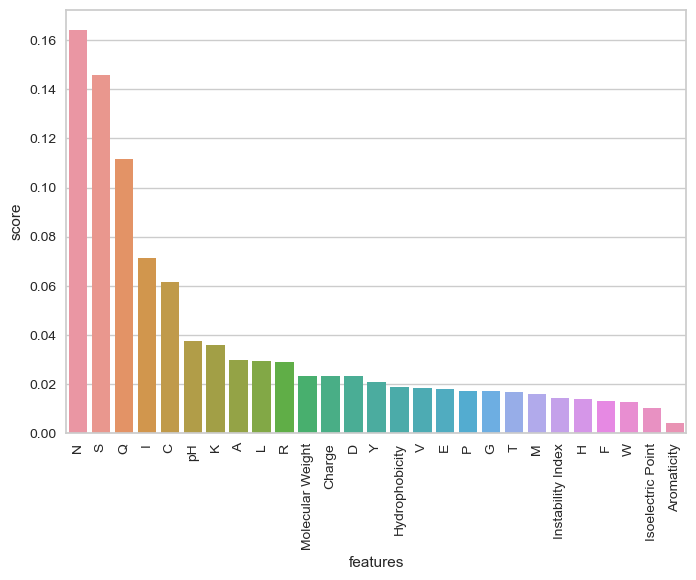

In [203]:
sns.barplot(x=f_imp['features'],y=f_imp['score'])
plt.xticks(rotation = 90)
plt.show()

**We can see that other than Aromaticity all other features have importance over 1% Amino Acids N,SQ,I,C followed by pH
having the highest importance followed by K A L R then molecular weight least important feature is the Aromaticity by our model**

**We will do further feature selection and see whether reduction features increases the performance of the model**

#### Selecting Features at different thresholds to see any differences

In [290]:
a = f_imp[f_imp['score'] > 0.01]['features']

In [291]:
rf = RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)
rf.fit(xtrain[a],ytrain)
pred_train = rf.predict(xtrain[a])
pred_test = rf.predict(xtest[a])
print('corr_train',spearmanr(ytrain,pred_train))
print('corr_test',spearmanr(ytest,pred_test))

corr_train SignificanceResult(statistic=0.8569576269363418, pvalue=0.0)
corr_test SignificanceResult(statistic=0.5826036112298126, pvalue=0.0)


In [292]:
a = f_imp[f_imp['score'] > 0.015]['features']
rf = RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)
rf.fit(xtrain[a],ytrain)
pred_train = rf.predict(xtrain[a])
pred_test = rf.predict(xtest[a])
print('corr_train',spearmanr(ytrain,pred_train))
print('corr_test',spearmanr(ytest,pred_test))

corr_train SignificanceResult(statistic=0.8467993845718587, pvalue=0.0)
corr_test SignificanceResult(statistic=0.5796455989259559, pvalue=0.0)


In [293]:
a = f_imp[f_imp['score'] > 0.020]['features']
rf = RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)
rf.fit(xtrain[a],ytrain)
pred_train = rf.predict(xtrain[a])
pred_test = rf.predict(xtest[a])
print('corr_train',spearmanr(ytrain,pred_train))
print('corr_test',spearmanr(ytest,pred_test))

corr_train SignificanceResult(statistic=0.8286370803349727, pvalue=0.0)
corr_test SignificanceResult(statistic=0.5701765676931874, pvalue=0.0)


**by removing based on feature importance there is very slight impor

## PipeLine Building 

In [204]:
from sklearn import set_config

In [205]:
set_config(display='diagram')

In [221]:
def amino_acid_ratio(X):
    amino_acid_counts = X['protein_sequence'].str.split('').explode().value_counts().drop('')
    amino_acids = amino_acid_counts.index
    for i in amino_acids:
        X[i] = X['protein_sequence'].str.count(i) / X['protien_length']
    X.drop(columns=['protein_sequence', 'protien_length'], inplace=True)  # Drop columns
    return X

def calculate_aromaticity(X):
    X['aromaticity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())
    return X

def calculate_molecular_weight(X):
    X['molecular_weight'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())
    return X

def calculate_instability_index(X):
    X['instability_index'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())
    return X

def calculate_hydrophobicity(X):
    X['hydrophobicity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))
    return X

def calculate_isoelectric_point(X):
    X['isoelectric_point'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())
    return X

def calculate_charge_at_pH(X):
    X['charge_at_pH'] = X.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)
    return X

In [188]:
df2

protein_sequence   pH    tm  \
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7   
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5   
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5   
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2   
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5   
...                                                  ...  ...   ...   
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0  51.8   
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0  37.2   
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0  64.6   
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0  50.7   
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0  37.6   

       protien_length         L         A         E         S         G  \
0                 341  0.108504  0.131965  0.087977  0.032258  0.111437   
1                 286  0.080420  0.097902  0.181818  0.048951  0.062937   
2                 497  0.036217  0.100604  0.064386  0.066398  0.130785   
3                 265  0.105660  0.075472  0.109434  0.060377  0.060377   
4                1451  0.071675  0.059269  0.053756  0.101999  0.057891   
...               ...       ...       ...       ...       ...       ...   
28951             549  0.083789  0.060109  0.056466  0.060109  0.092896   
28952             469  0.100213  0.078891  0.061834  0.078891  0.057569   
28953             128  0.046875  0.101562  0.054688  0.078125  0.085938   
28954             593  0.075885  0.079258  0.060708  0.086003  0.087690   
28955             537  0.147114  0.063315  0.059590  0.063315  0.044693   

              V  ...         M         H         C         W  Aromaticity  \
0      0.108504  ...  0.023460  0.008798  0.002933  0.011730         0.06   
1      0.045455  ...  0.006993  0.013986  0.000000  0.010490         0.04   
2      0.060362  ...  0.012072  0.022133  0.018109  0.006036         0.08   
3      0.052830  ...  0.007547  0.026415  0.018868  0.011321         0.07   
4      0.085458  ...  0.021365  0.027567  0.009649  0.011027         0.07   
...         ...  ...       ...       ...       ...       ...          ...   
28951  0.076503  ...  0.023679  0.027322  0.021858  0.023679         0.09   
28952  0.072495  ...  0.029851  0.046908  0.010661  0.010661         0.09   
28953  0.054688  ...  0.054688  0.015625  0.007812  0.031250         0.12   
28954  0.080944  ...  0.043845  0.018550  0.008432  0.005059         0.07   
28955  0.070764  ...  0.013035  0.039106  0.009311  0.033520         0.14   

       Molecular Weight  Instability Index  Hydrophobicity  Isoelectric Point  \
0              36320.72              28.39            0.15               6.11   
1              32837.99              65.11           -1.09               5.14   
2              53428.80              35.09           -0.71               9.03   
3              29475.60              50.50           -0.51               4.68   
4             158761.98              45.67           -0.40               5.92   
...                 ...                ...             ...                ...   
28951          61997.62              48.60           -0.54               8.47   
28952          52637.69              35.29           -0.10               6.53   
28953          14203.92              44.20           -0.33               5.27   
28954          64367.87              36.62           -0.14               5.69   
28955          62272.39              43.21            0.07               7.14   

       Charge  
0       -1.87  
1      -12.72  
2       11.73  
3      -20.56  
4      -21.66  
...       ...  
28951    6.03  
28952   -3.30  
28953   -3.06  
28954   -9.24  
28955    0.60  

[28898 rows x 30 columns]

In [179]:
RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)

RandomForestRegressor(max_depth=30, max_features=0.5, min_samples_leaf=7,
                      min_samples_split=15, n_estimators=1000, random_state=10)

In [223]:
X = df2[['protein_sequence', 'pH']]
y = df2['tm']

protein_sequence   pH
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0
...                                                  ...  ...
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0

[28898 rows x 2 columns]

In [312]:
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer

def Preprocess_1(X):
    # Create a DataFrame or NumPy array that includes all the preprocessing steps

    X['aromaticity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())

    X['molecular_weight'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())

    X['instability_index'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())

    X['hydrophobicity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))

    X['isoelectric_point'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())

    X['charge_at_pH'] = X.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)
    
    # Feature engineering for amino acid ratios
    


    return X
def Preprocess_2(X):
    amino_acid_counts = X['protein_sequence'].str.split('').explode().value_counts().drop('')
    amino_acids = amino_acid_counts.index
    for i in amino_acids:
        X[i] = X['protein_sequence'].str.count(i) / X['protien_length']
    X.drop(columns=['protein_sequence', 'protien_length'], inplace=True) 
    return X
pipe1 = Pipeline([
    ('preprocessor1', FunctionTransformer(Preprocess_1, validate=False)),
    ('preprocessor2', FunctionTransformer(Preprocess_2, validate=False)),
    ('regressor', RandomForestRegressor(    
    n_estimators=1000,  
    max_depth=30,  
    min_samples_split=15,
    min_samples_leaf=7,
    max_features=0.5,
    random_state=10))
])

   




In [313]:
pipe1

Pipeline(steps=[('preprocessor1',
                 FunctionTransformer(func=<function Preprocess_1 at 0x000001FFEF8D15E0>)),
                ('preprocessor2',
                 FunctionTransformer(func=<function Preprocess_2 at 0x000001FFEF8D1550>)),
                ('regressor',
                 RandomForestRegressor(max_depth=30, max_features=0.5,
                                       min_samples_leaf=7, min_samples_split=15,
                                       n_estimators=1000, random_state=10))])

In [316]:
X = df2[['protein_sequence', 'pH']]
y = df2['tm']
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)


In [317]:
xtrain.head(1)

protein_sequence   pH
5577  MAQKPLRLLACGDVEGKFDVLFNRVRTIQKKSGNFDLLLCVGNFFG...  7.0

pipe1.fit(xtrain,ytrain)

pipe1.predict(xtest)

## I will be creating a self defined custom pipeline for easy use

# Building the final PipeLine Testing and pickling the model

In [23]:
X = df3[['protein_sequence', 'pH']]
y = df3['tm']
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)

    

In [6]:
X

protein_sequence   pH
0      AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0
1      AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0
2      AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0
3      AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0
4      AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0
...                                                  ...  ...
28951  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0
28952  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0
28953  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0
28954  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0
28955  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0

[28898 rows x 2 columns]

In [36]:
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer


def Preprocess_1(X):
    # Create a DataFrame or NumPy array that includes all the preprocessing steps

    X['aromaticity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())

    X['molecular_weight'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())

    X['instability_index'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())

    X['hydrophobicity'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))

    X['isoelectric_point'] = X['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())

    X['charge_at_pH'] = X.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)
    
    # Feature engineering for amino acid ratios
    X['protien_length'] = X['protein_sequence'].apply(len)
    
    amino_acid_counts = X['protein_sequence'].str.split('').explode().value_counts().drop('')
    amino_acids = ['A','C','D','E','F','G','H','I', 'K','L','M','N','P','Q','R','S', 'T','V', 'W','Y']
    for i in amino_acids:
        X[i] = X['protein_sequence'].str.count(i) / X['protien_length']
    X.drop(columns=['protein_sequence', 'protien_length'], inplace=True) 
    return X

In [8]:
xtrain_p = Preprocess_1(xtrain)


In [9]:
xtest_p = Preprocess_1(xtest)

In [11]:
xtest_p.head(1)

pH  aromaticity  molecular_weight  instability_index  hydrophobicity  \
14091  7.0     0.122917        56344.9754           38.17775       -0.553958   

       isoelectric_point  charge_at_pH       L         A       E  ...  \
14091           5.199881    -20.249819  0.0875  0.027083  0.0875  ...   

              T         P         Q         N         F         Y         M  \
14091  0.045833  0.014583  0.022917  0.072917  0.058333  0.058333  0.022917   

              H       C        W  
14091  0.029167  0.0125  0.00625  

[1 rows x 27 columns]

In [331]:
xtest_p

pH  aromaticity  molecular_weight  instability_index  hydrophobicity  \
14091  7.0     0.122917        56344.9754          38.177750       -0.553958   
188    7.0     0.124105        48670.6776          37.468067       -0.669451   
8035   7.0     0.051118        34843.5411          32.371885       -0.279553   
3150   7.0     0.082126        47075.6883          53.888406       -0.476570   
12059  7.0     0.162500        17505.6785          34.942562        1.133750   
...    ...          ...               ...                ...             ...   
14103  7.0     0.054054       148986.1714          55.688446       -0.908483   
6524   7.0     0.066800       108888.8757          39.940289       -0.064706   
6030   7.0     0.086455        37891.9632          41.033429       -0.225360   
27601  7.0     0.093426        32913.2155          39.619412       -0.524221   
13594  4.6     0.090000        10932.6704          32.219100       -0.110000   

       isoelectric_point  charge_at_pH         L         A         E  ...  \
14091           5.199881    -20.249819  0.087500  0.027083  0.087500  ...   
188             6.358430     -3.133194  0.093079  0.045346  0.076372  ...   
8035            5.677840     -9.417635  0.073482  0.067093  0.092652  ...   
3150            5.002081    -20.641001  0.103865  0.062802  0.086957  ...   
12059           4.333371     -4.529857  0.150000  0.081250  0.031250  ...   
...                  ...           ...       ...       ...       ...  ...   
14103           8.049539      5.109661  0.070571  0.062312  0.075826  ...   
6524            5.225061    -32.312923  0.113659  0.110668  0.070788  ...   
6030            6.382132     -1.238525  0.074928  0.051873  0.072046  ...   
27601           4.772736    -15.763761  0.072664  0.089965  0.083045  ...   
13594           9.160780      8.980623  0.100000  0.110000  0.030000  ...   

              T         P         Q         N         F         Y         M  \
14091  0.045833  0.014583  0.022917  0.072917  0.058333  0.058333  0.022917   
188    0.042959  0.059666  0.021480  0.045346  0.052506  0.040573  0.028640   
8035   0.070288  0.047923  0.031949  0.035144  0.015974  0.025559  0.019169   
3150   0.041063  0.043478  0.055556  0.041063  0.048309  0.021739  0.024155   
12059  0.075000  0.050000  0.012500  0.006250  0.093750  0.043750  0.037500   
...         ...       ...       ...       ...       ...       ...       ...   
14103  0.044294  0.058559  0.058559  0.041291  0.031532  0.016517  0.023273   
6524   0.054835  0.048853  0.036889  0.027916  0.026919  0.034895  0.022931   
6030   0.043228  0.063401  0.017291  0.028818  0.034582  0.034582  0.031700   
27601  0.072664  0.034602  0.062284  0.055363  0.044983  0.027682  0.006920   
13594  0.060000  0.060000  0.030000  0.050000  0.040000  0.040000  0.030000   

              H         C         W  
14091  0.029167  0.012500  0.006250  
188    0.028640  0.011933  0.031026  
8035   0.038339  0.009585  0.009585  
3150   0.026570  0.050725  0.012077  
12059  0.000000  0.025000  0.025000  
...         ...       ...       ...  
14103  0.021021  0.009009  0.006006  
6524   0.023928  0.007976  0.004985  
6030   0.008646  0.014409  0.017291  
27601  0.017301  0.010381  0.020761  
13594  0.000000  0.080000  0.010000  

[7225 rows x 27 columns]

In [12]:
model = RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)

In [333]:
model.fit(xtrain_p,ytrain)

RandomForestRegressor(max_depth=30, max_features=0.5, min_samples_leaf=7,
                      min_samples_split=15, n_estimators=1000, random_state=10)

In [334]:

pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)
print('corr_train',spearmanr(ytrain,pred_train))
print('corr_test',spearmanr(ytest,pred_test))

corr_train SignificanceResult(statistic=0.8574630627457216, pvalue=0.0)
corr_test SignificanceResult(statistic=0.5822233413869056, pvalue=0.0)


In [337]:
#to make this easier builiding a custom pipeline 

In [421]:
class CustomModel:
    def __init__(self):
        self.model = RandomForestRegressor(    
            n_estimators=1000,  
            max_depth=30,  
            min_samples_split=15,
            min_samples_leaf=7,
            max_features=0.5,
            random_state=10
        )
    
    def fit(self, X, y):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
        X_copy = self.preprocess(X_copy)  # Preprocess the copied data
        self.model.fit(X_copy, y)
    
    def predict(self, X):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
        X_copy = self.preprocess(X_copy)  # Preprocess the copied data
        return self.model.predict(X_copy)
        
    def preprocess(self, X):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
    
        X_copy['aromaticity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())
        X_copy['molecular_weight'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())
        X_copy['instability_index'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())
        X_copy['hydrophobicity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))
        X_copy['isoelectric_point'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())
        X_copy['charge_at_pH'] = X_copy.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)
    
        X_copy['protien_length'] = X_copy['protein_sequence'].apply(len)
        amino_acid_counts = X_copy['protein_sequence'].str.split('').explode().value_counts().drop('')
        amino_acids = sorted(amino_acid_counts.index)
        for i in amino_acids:
            X_copy[i] = X_copy['protein_sequence'].str.count(i) / X_copy['protien_length']
        X_copy.drop(columns=['protein_sequence', 'protien_length'], inplace=True)
    
        return X_copy


In [38]:
X = df3[['protein_sequence', 'pH']]
y = df3['tm']
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)


In [39]:
xtrain.head(1)

protein_sequence   pH
5577  MAQKPLRLLACGDVEGKFDVLFNRVRTIQKKSGNFDLLLCVGNFFG...  7.0

In [423]:
model1  =CustomModel()
model1.fit(xtrain,ytrain)

In [346]:

pred_test = model1.predict(xtest)
print('corr_test',spearmanr(ytest,pred_test))

corr_test SignificanceResult(statistic=0.5822233413869056, pvalue=0.0)


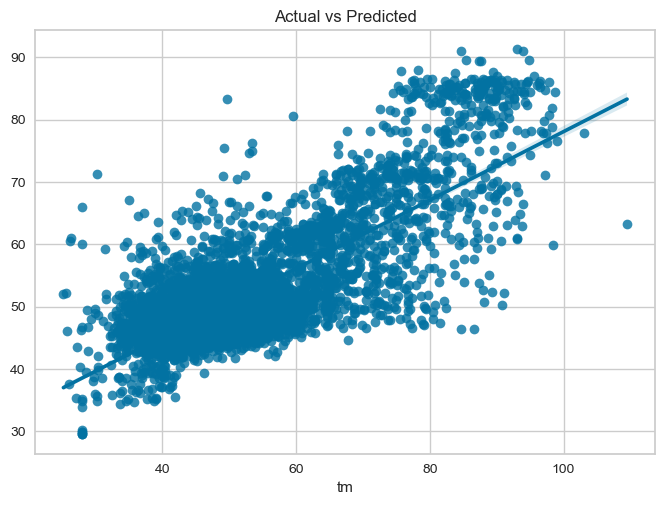

In [354]:


sns.regplot(x=ytest,y=pred_test)
plt.title('Actual vs Predicted')
plt.show()

# Test Prediction unseen 

In [424]:

pred_test = model1.predict(xtest)
print('corr_test',spearmanr(ytest,pred_test))

corr_test SignificanceResult(statistic=0.5823032752222939, pvalue=0.0)


In [425]:
test_k = pd.read_csv('test.csv')
test_k.drop(columns = ['seq_id','data_source'],inplace=True)

In [458]:
test_k.iloc[1,0]

'VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'

In [427]:
pred_test = model1.predict(test_k)


In [428]:
pred_test

array([53.50190328, 53.75993362, 53.9233286 , ..., 53.68643956,
       53.8304672 , 53.7290132 ])

test_label = pd.read_csv('test.csv')
test_label['tm'] = pred_test

test_label = test_label[['seq_id','tm']]


test_label.to_csv('test_result.csv',index=False)

# Deployment of the Model using Streamlit

In [438]:
import streamlit as st
import pickle

In [440]:
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
file.close()

In [441]:
with open('model1.pkl', 'rb') as file:
    reg_model = pickle.load(file)

## Model Deployment

In [ ]:
        amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


In [461]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pickle
from sklearn.ensemble import RandomForestRegressor







class CustomModel:
    def __init__(self):
        self.model = RandomForestRegressor(    
            n_estimators=1000,  
            max_depth=30,  
            min_samples_split=15,
            min_samples_leaf=7,
            max_features=0.5,
            random_state=10
        )
    
    def fit(self, X, y):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
        X_copy = self.preprocess(X_copy)  # Preprocess the copied data
        self.model.fit(X_copy, y)
    
    def predict(self, X):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
        X_copy = self.preprocess(X_copy)  # Preprocess the copied data
        return self.model.predict(X_copy)
        
    def preprocess(self, X):
        X_copy = X.copy()  # Create a copy of X to avoid modifying the original
    
        X_copy['aromaticity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())
        X_copy['molecular_weight'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())
        X_copy['instability_index'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())
        X_copy['hydrophobicity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))
        X_copy['isoelectric_point'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())
        X_copy['charge_at_pH'] = X_copy.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)
    
        X_copy['protien_length'] = X_copy['protein_sequence'].apply(len)
        amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
        for i in amino_acids:
            X_copy[i] = X_copy['protein_sequence'].str.count(i) / X_copy['protien_length']
        X_copy.drop(columns=['protein_sequence', 'protien_length'], inplace=True)
    
        return X_copy





st.title('Web Deployment of Enzyme Thermostability  App')
st.subheader('To Predict the Thermostability at given pH based on protien structure')
st.set_option('deprecation.showPyplotGlobalUse', False)
with open('model1.pkl', 'rb') as file:
    reg_model = pickle.load(file)
file.close()


protein_sequence = st.text_input('Enter the Protien Sequence','AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS')
pH = st.number_input('pH',1.0,12.0,7.0)
X = pd.DataFrame({'protein_sequence':protein_sequence,'pH':pH},index=[0])


if st.button('Predict'):
    pred = reg_model.predict(X)
    st.subheader(f'The thermostability of the Enzyme at pH : {np.round(pH,2)} is : {np.round(pred,2)}')

    
    
st.subheader('Made by :')

contact_info = """ https://www.linkedin.com/in/ajish-kurian-daniel/ """

st.markdown(contact_info)



Overwriting app.py


In [449]:
xtrain_p.columns

Index(['pH', 'aromaticity', 'molecular_weight', 'instability_index',
       'hydrophobicity', 'isoelectric_point', 'charge_at_pH', 'L', 'A', 'E',
       'S', 'G', 'V', 'K', 'D', 'R', 'I', 'T', 'P', 'Q', 'N', 'F', 'Y', 'M',
       'H', 'C', 'W'],
      dtype='object')

## Built and Deployed Enzyme Stability App on Streamlit

In [79]:
import streamlit 
import pandas 
import numpy 
import Bio
import sklearn

In [80]:
pandas.__version__

'1.4.4'

In [81]:
numpy.__version__

'1.21.5'

In [82]:
sklearn.__version__

'1.0.2'

In [83]:
Bio.__version__

'1.81'

In [84]:
streamlit.__version__

'1.27.1'

In [ ]:
Bio.SeqUtils

In [ ]:
python.

In [61]:
model = RandomForestRegressor(    
    n_estimators= 1000,  
    max_depth=30,  
    min_samples_split= 15,
    min_samples_leaf= 7,
    max_features= 0.5,random_state=10)


In [68]:
X = df3[['protein_sequence', 'pH']]
y = df3['tm']
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)


In [69]:
xtest

protein_sequence   pH
14091  MKVRFLQISDLHFQFQNYDTIVMRDKLLDFIEVLRRESDFDFLLLT...  7.0
188    AGKFGTPEKDIEEIREHFFYTRKRGEPHRVLVEVSSKTTSSEDGGN...  7.0
8035   MDVIKISPRGYCYGVVDAMVIAKNASLDKSLPRPIYILGMIVHNKH...  7.0
3150   MAAPVDDMFSRCVDSAKASNCVDVRFINNVKGKGLFAKKPFKKGDT...  7.0
12059  MIPPVSLFIGTTQYGWSIAGSDVMKLTTESALPIAILFYFSLLVGL...  7.0
...                                                  ...  ...
14103  MKVTVCFGRTRVVVPCGDGRMKVFSLIQQAVTRYRKAVAKDPNYWI...  7.0
6524   MATPMVSSAGGLLAMLNEPHPVLKLHALSNLNNLVDQFWPEISTSV...  7.0
6030   MASLISFSLLPKPKAVRSSISAPQTQTINTEKLEDKFGRKGIKFSE...  7.0
27601  QPPSQTVEQTVRHIYQNYKSDATAPYFGETGERAITSARIQQALTL...  7.0
13594  MKMSRLCLSVALLVLLGTLAASTPGCDTSNQAKAQRPDFCLEPPYT...  4.6

[7225 rows x 2 columns]

In [64]:
xtrain_p =Preprocess_1(xtrain)

In [65]:
model.fit(xtrain_p,ytrain)

RandomForestRegressor(max_depth=30, max_features=0.5, min_samples_leaf=7,
                      min_samples_split=15, n_estimators=1000, random_state=10)

In [70]:
xtest_p = Preprocess_1(xtest)

In [71]:
pred_test = model.predict(xtest_p)
print('corr_test',spearmanr(ytest,pred_test))

corr_test SignificanceResult(statistic=0.5823030104180621, pvalue=0.0)


In [29]:
import pickle

In [74]:
model.predict(x)

array([49.59177611, 47.83893977])

In [75]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('random_forest_model.pkl', 'rb') as file:
    model_reg = pickle.load(file)    

In [76]:
model_reg.predict(x)

array([49.59177611, 47.83893977])

In [77]:
%%writefile app1.py
import streamlit as st
import pandas as pd
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pickle
from sklearn.ensemble import RandomForestRegressor


def Preprocess_1( X):
    X_copy = X.copy()  # Create a copy of X to avoid modifying the original

    X_copy['aromaticity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())
    X_copy['molecular_weight'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())
    X_copy['instability_index'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())
    X_copy['hydrophobicity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))
    X_copy['isoelectric_point'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())
    X_copy['charge_at_pH'] = X_copy.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)

    X_copy['protien_length'] = X_copy['protein_sequence'].apply(len)
    amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    for i in amino_acids:
        X_copy[i] = X_copy['protein_sequence'].str.count(i) / X_copy['protien_length']
    X_copy.drop(columns=['protein_sequence', 'protien_length'], inplace=True)

    return X_copy



st.title('Web Deployment of Enzyme Thermostability  App')
st.subheader('To Predict the Thermostability at given pH based on protien structure')
st.set_option('deprecation.showPyplotGlobalUse', False)
with open('random_forest_model.pkl', 'rb') as file:
    model_reg = pickle.load(file)    
file.close()


protein_sequence = st.text_input('Enter the Protien Sequence','AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS')
pH = st.number_input('pH',1.0,12.0,7.0)
X = pd.DataFrame({'protein_sequence':protein_sequence,'pH':pH},index=[0])
X = Preprocess_1(X)

if st.button('Predict'):
    pred = model_reg.predict(X)
    st.subheader(f'The thermostability of the Enzyme at pH : {np.round(pH,2)} is : {np.round(pred,2)}')

    
    
st.subheader('Made by :')

contact_info = """ https://www.linkedin.com/in/ajish-kurian-daniel/ """

st.markdown(contact_info)

Overwriting app1.py


In [51]:
X = df3[['protein_sequence', 'pH']]
y = df3['tm']
xtrain,xtest,ytrain,ytest =train_test_split(X,y,random_state=10)


In [ ]:

def Preprocess_1( X):
    X_copy = X.copy()  # Create a copy of X to avoid modifying the original

    X_copy['aromaticity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).aromaticity())
    X_copy['molecular_weight'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).molecular_weight())
    X_copy['instability_index'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).instability_index())
    X_copy['hydrophobicity'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).gravy(scale='KyteDoolitle'))
    X_copy['isoelectric_point'] = X_copy['protein_sequence'].apply(lambda sequence: ProteinAnalysis(sequence).isoelectric_point())
    X_copy['charge_at_pH'] = X_copy.apply(lambda row: ProteinAnalysis(row['protein_sequence']).charge_at_pH(row['pH']), axis=1)

    X_copy['protien_length'] = X_copy['protein_sequence'].apply(len)
    amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    for i in amino_acids:
        X_copy[i] = X_copy['protein_sequence'].str.count(i) / X_copy['protien_length']
    X_copy.drop(columns=['protein_sequence', 'protien_length'], inplace=True)

    return X_copy



In [52]:
xtest_p = Preprocess_1(xtest)

In [53]:
xtest_p

pH  aromaticity  molecular_weight  instability_index  hydrophobicity  \
14091  7.0     0.122917        56344.9754          38.177750       -0.553958   
188    7.0     0.124105        48670.6776          37.468067       -0.669451   
8035   7.0     0.051118        34843.5411          32.371885       -0.279553   
3150   7.0     0.082126        47075.6883          53.888406       -0.476570   
12059  7.0     0.162500        17505.6785          34.942562        1.133750   
...    ...          ...               ...                ...             ...   
14103  7.0     0.054054       148986.1714          55.688446       -0.908483   
6524   7.0     0.066800       108888.8757          39.940289       -0.064706   
6030   7.0     0.086455        37891.9632          41.033429       -0.225360   
27601  7.0     0.093426        32913.2155          39.619412       -0.524221   
13594  4.6     0.090000        10932.6704          32.219100       -0.110000   

       isoelectric_point  charge_at_pH         A         C         D  ...  \
14091           5.199881    -20.249819  0.027083  0.012500  0.083333  ...   
188             6.358430     -3.133194  0.045346  0.011933  0.071599  ...   
8035            5.677840     -9.417635  0.067093  0.009585  0.057508  ...   
3150            5.002081    -20.641001  0.062802  0.050725  0.070048  ...   
12059           4.333371     -4.529857  0.081250  0.025000  0.018750  ...   
...                  ...           ...       ...       ...       ...  ...   
14103           8.049539      5.109661  0.062312  0.009009  0.071321  ...   
6524            5.225061    -32.312923  0.110668  0.007976  0.053838  ...   
6030            6.382132     -1.238525  0.051873  0.014409  0.046110  ...   
27601           4.772736    -15.763761  0.089965  0.010381  0.076125  ...   
13594           9.160780      8.980623  0.110000  0.080000  0.030000  ...   

              M         N         P         Q         R         S         T  \
14091  0.022917  0.072917  0.014583  0.022917  0.031250  0.066667  0.045833   
188    0.028640  0.045346  0.059666  0.021480  0.062053  0.050119  0.042959   
8035   0.019169  0.035144  0.047923  0.031949  0.028754  0.044728  0.070288   
3150   0.024155  0.041063  0.043478  0.055556  0.057971  0.072464  0.041063   
12059  0.037500  0.006250  0.050000  0.012500  0.018750  0.081250  0.075000   
...         ...       ...       ...       ...       ...       ...       ...   
14103  0.023273  0.041291  0.058559  0.058559  0.089339  0.100601  0.044294   
6524   0.022931  0.027916  0.048853  0.036889  0.039880  0.080758  0.054835   
6030   0.031700  0.028818  0.063401  0.017291  0.037464  0.112392  0.043228   
27601  0.006920  0.055363  0.034602  0.062284  0.055363  0.055363  0.072664   
13594  0.030000  0.050000  0.060000  0.030000  0.070000  0.060000  0.060000   

              V         W         Y  
14091  0.047917  0.006250  0.058333  
188    0.045346  0.031026  0.040573  
8035   0.102236  0.009585  0.025559  
3150   0.041063  0.012077  0.021739  
12059  0.068750  0.025000  0.043750  
...         ...       ...       ...  
14103  0.058559  0.006006  0.016517  
6524   0.070788  0.004985  0.034895  
6030   0.080692  0.017291  0.034582  
27601  0.069204  0.020761  0.027682  
13594  0.030000  0.010000  0.040000  

[7225 rows x 27 columns]

In [56]:
xm = pd.DataFrame({'protein_sequence':'AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS' , 'pH':7.0 },index =[0])

In [57]:
xm

protein_sequence   pH
0  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0

In [58]:
Preprocess_1(xm)


pH  aromaticity  molecular_weight  instability_index  hydrophobicity  \
0  7.0     0.041958        32837.9931          65.108392        -1.08951   

   isoelectric_point  charge_at_pH         A    C         D  ...         M  \
0           5.144349    -12.720355  0.097902  0.0  0.034965  ...  0.006993   

          N         P         Q         R         S         T         V  \
0  0.020979  0.027972  0.076923  0.104895  0.048951  0.041958  0.045455   

         W        Y  
0  0.01049  0.01049  

[1 rows x 27 columns]

In [60]:
model_reg.predict(xm)

array([47.40898967])